# Imports

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import gzip
import json
from datetime import datetime, date
import numpy as np
import os

## Getting the data ready to be analyzed

In [152]:
# to do not waste too much memory
if not os.path.isfile('italian_precompiled_df/italian_user_warnings_df.pkl'):
    italian_user_warnings_df = list()
    with gzip.open('itwiki_20210201_refactored_user_warnigs_transcluded_dataset.json.gz', 'rb') as json_file:      
        for i, l in enumerate(json_file.readlines()):
            italian_user_warnings_df.append(json.loads(l.decode('utf-8')))
            if i > 0 and i % 100000 == 0:
                print('I have done {} lines so far'.format(i))
    italian_user_warnings_df = pd.DataFrame(italian_user_warnings_df)
    italian_user_warnings_df.to_pickle('italian_precompiled_df/italian_user_warnings_df.pkl')
else:
    italian_user_warnings_df = pd.read_pickle('italian_precompiled_df/italian_user_warnings_df.pkl')

In [153]:
# italian_user_warnings_df.head()

In [154]:
italian_user_warnings_df.shape

(1346220, 4)

In [155]:
italian_user_warnings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346220 entries, 0 to 1346219
Data columns (total 4 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   id_talk_page            1346220 non-null  int64 
 1   user_warnings_stats     1346220 non-null  object
 2   user_warnings_recieved  1346220 non-null  object
 3   name                    1346220 non-null  object
dtypes: int64(1), object(3)
memory usage: 41.1+ MB


In [156]:
italian_user_warnings_df.describe()

id_talk_page
count  1.346220e+06
mean   5.274526e+06
std    2.342870e+06
min    3.760000e+02
25%    3.378842e+06
50%    5.832742e+06
75%    7.278263e+06
max    8.815998e+06

## Categories analysis

In [157]:
# Load the datasets
if os.path.isfile('italian_precompiled_df/italian_user_warnings_counter_total.pkl') and os.path.isfile('italian_precompiled_df/italian_user_warnings_counter_substituted.pkl') and os.path.isfile('italian_precompiled_df/italian_user_warnings_counter_transcluded.pkl'):
    italian_user_warnings_counter_total_df = pd.read_pickle('italian_precompiled_df/italian_user_warnings_counter_total.pkl')
    italian_user_warnings_counter_substituted_df = pd.read_pickle('italian_precompiled_df/italian_user_warnings_counter_substituted.pkl')
    italian_user_warnings_counter_transcluded_df = pd.read_pickle('italian_precompiled_df/italian_user_warnings_counter_transcluded.pkl')
else:
    italian_user_warnings_counter_transcluded_df = list()
    italian_user_warnings_counter_substituted_df = list()
    italian_user_warnings_counter_total_df = list()

    year_total_dict = dict()
    year_transcluded_dict = dict()
    year_substituted_dict = dict()

    # iterating over the previous dataset
    for i, row in italian_user_warnings_df.iterrows():

        # explicit the user warnings
        for year in row['user_warnings_stats']:

            if not year in year_total_dict:
                year_total_dict[year] = dict()
                year_transcluded_dict[year] = dict()
                year_substituted_dict[year] = dict()

            for month in row['user_warnings_stats'][year]:

                if not month in year_total_dict[year]:
                    year_total_dict[year][month] = dict()
                    year_transcluded_dict[year][month] = dict()
                    year_substituted_dict[year][month] = dict()

                    year_total_dict[year][month]['serious'] = 0
                    year_total_dict[year][month]['warning'] = 0
                    year_total_dict[year][month]['not_serious'] = 0

                    year_transcluded_dict[year][month]['serious'] = 0
                    year_transcluded_dict[year][month]['warning'] = 0
                    year_transcluded_dict[year][month]['not_serious'] = 0

                    year_substituted_dict[year][month]['serious'] = 0
                    year_substituted_dict[year][month]['warning'] = 0
                    year_substituted_dict[year][month]['not_serious'] = 0

                serious_transcluded = row['user_warnings_stats'][year][month]['serious_transcluded']
                warning_transcluded = row['user_warnings_stats'][year][month]['warning_transcluded']
                not_serious_transcluded = row['user_warnings_stats'][year][month]['not_serious_transcluded']

                serious_substituted = row['user_warnings_stats'][year][month]['serious_substituted']
                warning_substituted = row['user_warnings_stats'][year][month]['warning_substituted']
                not_serious_substituted = row['user_warnings_stats'][year][month]['not_serious_substituted']

                year_total_dict[year][month]['serious'] += serious_transcluded + serious_substituted
                year_total_dict[year][month]['warning'] += warning_transcluded + warning_substituted
                year_total_dict[year][month]['not_serious'] += not_serious_transcluded + not_serious_substituted

                year_transcluded_dict[year][month]['serious'] += serious_transcluded
                year_transcluded_dict[year][month]['warning'] += warning_transcluded
                year_transcluded_dict[year][month]['not_serious'] += not_serious_transcluded

                year_substituted_dict[year][month]['serious'] += serious_substituted
                year_substituted_dict[year][month]['warning'] += warning_substituted
                year_substituted_dict[year][month]['not_serious'] += not_serious_substituted           

    for year in year_total_dict:
        for month in year_total_dict[year]:
            row = dict()

            row['date'] = '-'.join([year, month])
            row['serious'] = year_total_dict[year][month]['serious']
            row['warning'] = year_total_dict[year][month]['warning']
            row['not_serious'] = year_total_dict[year][month]['not_serious']

            italian_user_warnings_counter_total_df.append(row)

            row = dict()
            row['date'] = '-'.join([year, month])
            row['serious'] = year_transcluded_dict[year][month]['serious']
            row['warning'] = year_transcluded_dict[year][month]['warning']
            row['not_serious'] = year_transcluded_dict[year][month]['not_serious']

            italian_user_warnings_counter_transcluded_df.append(row)

            row = dict()
            row['date'] = '-'.join([year, month])
            row['serious'] = year_substituted_dict[year][month]['serious']
            row['warning'] = year_substituted_dict[year][month]['warning']
            row['not_serious'] = year_substituted_dict[year][month]['not_serious']

            italian_user_warnings_counter_substituted_df.append(row)

    italian_user_warnings_counter_total_df = pd.DataFrame(italian_user_warnings_counter_total_df).reset_index(drop=True)
    italian_user_warnings_counter_total_df['date'] = pd.to_datetime(italian_user_warnings_counter_total_df['date']).dt.date
    italian_user_warnings_counter_total_df = italian_user_warnings_counter_total_df.sort_values('date')
    italian_user_warnings_counter_total_df.to_pickle('italian_precompiled_df/italian_user_warnings_counter_total.pkl')


    italian_user_warnings_counter_substituted_df = pd.DataFrame(italian_user_warnings_counter_substituted_df).reset_index(drop=True)
    italian_user_warnings_counter_substituted_df['date'] = pd.to_datetime(italian_user_warnings_counter_substituted_df['date']).dt.date
    italian_user_warnings_counter_substituted_df = italian_user_warnings_counter_substituted_df.sort_values('date')
    italian_user_warnings_counter_substituted_df.to_pickle('italian_precompiled_df/italian_user_warnings_counter_substituted.pkl')

    italian_user_warnings_counter_transcluded_df = pd.DataFrame(italian_user_warnings_counter_transcluded_df).reset_index(drop=True)
    italian_user_warnings_counter_transcluded_df['date'] = pd.to_datetime(italian_user_warnings_counter_transcluded_df['date']).dt.date
    italian_user_warnings_counter_transcluded_df = italian_user_warnings_counter_transcluded_df.sort_values('date')
    italian_user_warnings_counter_transcluded_df.to_pickle('italian_precompiled_df/italian_user_warnings_counter_transcluded.pkl')

## Total amount of user warnings recieved

In [158]:
italian_user_warnings_counter_total_df.head()

date  serious  warning  not_serious
216  2002-01-01        0        0            0
217  2002-02-01        0        0            0
218  2002-03-01        0        0            0
219  2002-04-01        0        0            0
220  2002-05-01        0        0            0

In [159]:
italian_user_warnings_counter_total_df.tail()

date  serious  warning  not_serious
211  2021-08-01        0        0            0
212  2021-09-01        0        0            0
213  2021-10-01        0        0            0
214  2021-11-01        0        0            0
215  2021-12-01        0        0            0

In [160]:
italian_user_warnings_counter_total_df.shape

(240, 4)

In [161]:
italian_user_warnings_counter_total_df.describe()

serious  warning    not_serious
count    240.00000    240.0     240.000000
mean    3008.38750      0.0    5666.179167
std     2548.08419      0.0   25960.549703
min        0.00000      0.0       0.000000
25%      289.50000      0.0     415.500000
50%     3505.50000      0.0    2541.000000
75%     4730.00000      0.0    5787.500000
max    22232.00000      0.0  399539.000000

## Total amount of user warnings grouped by category

In [162]:
italian_user_warnings_counter_total_registered_df = italian_user_warnings_counter_total_df.sum().to_frame().reset_index().set_axis(['category', 'count'], axis='columns')
italian_user_warnings_counter_total_registered_df.head()

category    count
0      serious   722013
1      warning        0
2  not_serious  1359883

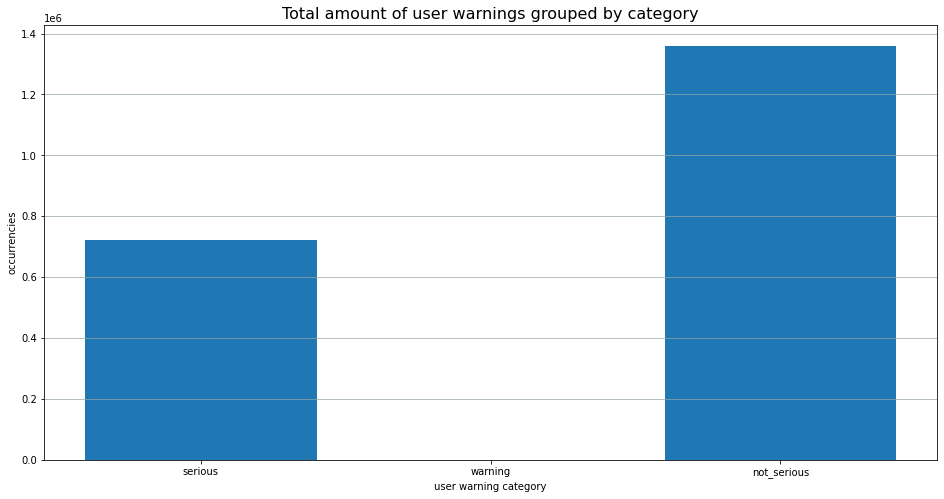

In [163]:
plt.figure(figsize=(16,8))
plt.bar(italian_user_warnings_counter_total_registered_df['category'], italian_user_warnings_counter_total_registered_df['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='horizontal')
plt.title('Total amount of user warnings grouped by category', fontsize=16)
plt.ylabel('occurrencies')
plt.xlabel('user warning category')
plt.show()

## Total amount of transcluded user warnings recieved 

In [164]:
italian_user_warnings_counter_transcluded_df.head()

date  serious  warning  not_serious
216  2002-01-01        0        0            0
217  2002-02-01        0        0            0
218  2002-03-01        0        0            0
219  2002-04-01        0        0            0
220  2002-05-01        0        0            0

In [165]:
italian_user_warnings_counter_transcluded_df.tail()

date  serious  warning  not_serious
211  2021-08-01        0        0            0
212  2021-09-01        0        0            0
213  2021-10-01        0        0            0
214  2021-11-01        0        0            0
215  2021-12-01        0        0            0

In [166]:
italian_user_warnings_counter_transcluded_df.shape

(240, 4)

In [167]:
italian_user_warnings_counter_transcluded_df.describe()

serious  warning    not_serious
count    240.00000    240.0     240.000000
mean    3008.38750      0.0    5666.179167
std     2548.08419      0.0   25960.549703
min        0.00000      0.0       0.000000
25%      289.50000      0.0     415.500000
50%     3505.50000      0.0    2541.000000
75%     4730.00000      0.0    5787.500000
max    22232.00000      0.0  399539.000000

## Line graph user showing the user warnings recieved monthly (transcluded amount)

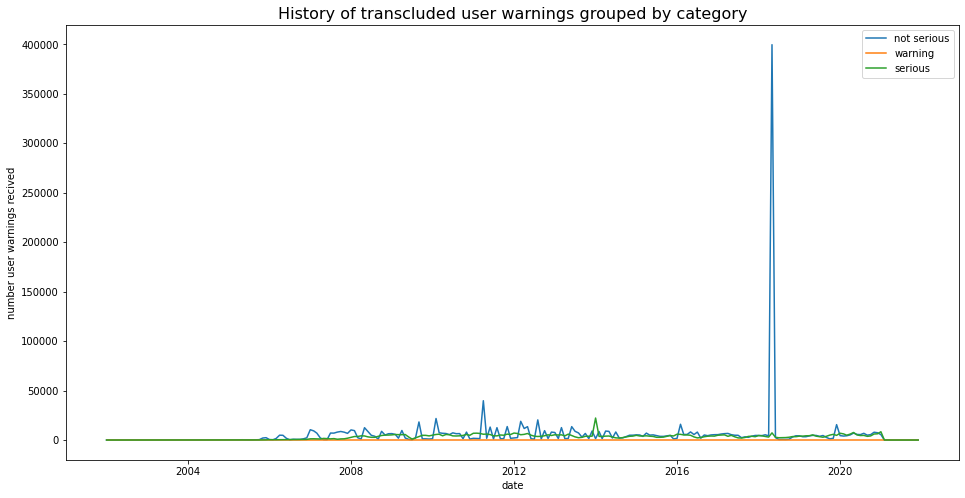

In [168]:
plt.figure(figsize=(16,8))
plt.plot(italian_user_warnings_counter_transcluded_df['date'], italian_user_warnings_counter_transcluded_df['not_serious'], label = 'not serious')
plt.plot(italian_user_warnings_counter_transcluded_df['date'], italian_user_warnings_counter_transcluded_df['warning'], label = 'warning')
plt.plot(italian_user_warnings_counter_transcluded_df['date'], italian_user_warnings_counter_transcluded_df['serious'], label = 'serious')
plt.legend()
plt.title('History of transcluded user warnings grouped by category', fontsize=16)
plt.ylabel('number user warnings recived')
plt.xlabel('date')
plt.show()

In [169]:
fig = px.line(italian_user_warnings_counter_transcluded_df, x='date', y=['not_serious', 'warning', 'serious'], labels={"value": "number of total user warnings recieved", "variable": "user warning category"}, title='History of transcluded user warnings grouped by category')
fig.show()

## Total amount of transcluded user warnings grouped by category

In [170]:
italian_user_warnings_counter_transcluded_registered_df = italian_user_warnings_counter_transcluded_df.sum().to_frame().reset_index().set_axis(['category', 'count'], axis='columns')
italian_user_warnings_counter_transcluded_registered_df.head()

category    count
0      serious   722013
1      warning        0
2  not_serious  1359883

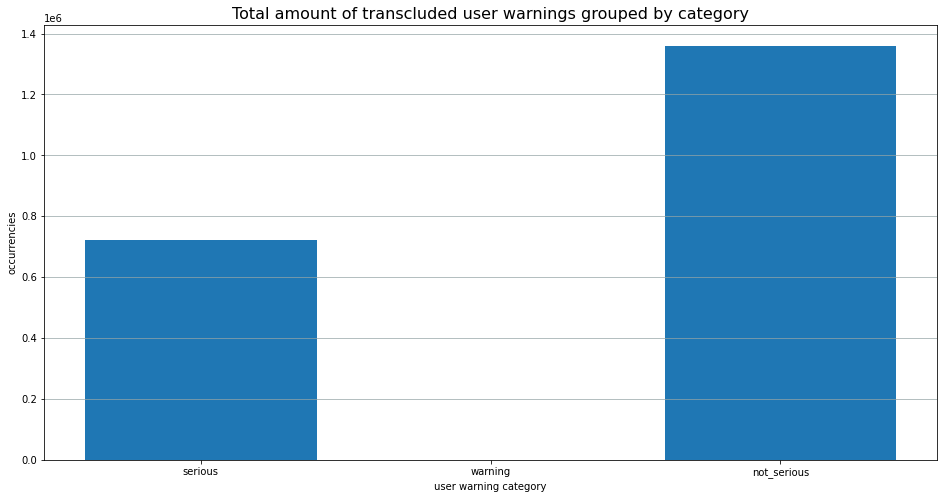

In [171]:
plt.figure(figsize=(16,8))
plt.bar(italian_user_warnings_counter_transcluded_registered_df['category'], italian_user_warnings_counter_transcluded_registered_df['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='horizontal')
plt.title('Total amount of transcluded user warnings grouped by category', fontsize=16)
plt.ylabel('occurrencies')
plt.xlabel('user warning category')
plt.show()

## Total amount of substituted user warnings recieved 

In [172]:
italian_user_warnings_counter_substituted_df.head()

date  serious  warning  not_serious
216  2002-01-01        0        0            0
217  2002-02-01        0        0            0
218  2002-03-01        0        0            0
219  2002-04-01        0        0            0
220  2002-05-01        0        0            0

In [173]:
italian_user_warnings_counter_substituted_df.head()

date  serious  warning  not_serious
216  2002-01-01        0        0            0
217  2002-02-01        0        0            0
218  2002-03-01        0        0            0
219  2002-04-01        0        0            0
220  2002-05-01        0        0            0

In [174]:
italian_user_warnings_counter_substituted_df.shape

(240, 4)

In [175]:
italian_user_warnings_counter_substituted_df.describe()

serious  warning  not_serious
count    240.0    240.0        240.0
mean       0.0      0.0          0.0
std        0.0      0.0          0.0
min        0.0      0.0          0.0
25%        0.0      0.0          0.0
50%        0.0      0.0          0.0
75%        0.0      0.0          0.0
max        0.0      0.0          0.0

## Total amount substituted user warnings grouped by category

In [176]:
italian_user_warnings_counter_substituted_registered_df = italian_user_warnings_counter_substituted_df.sum().to_frame().reset_index().set_axis(['category', 'count'], axis='columns')
italian_user_warnings_counter_substituted_registered_df.head()

category  count
0      serious      0
1      warning      0
2  not_serious      0

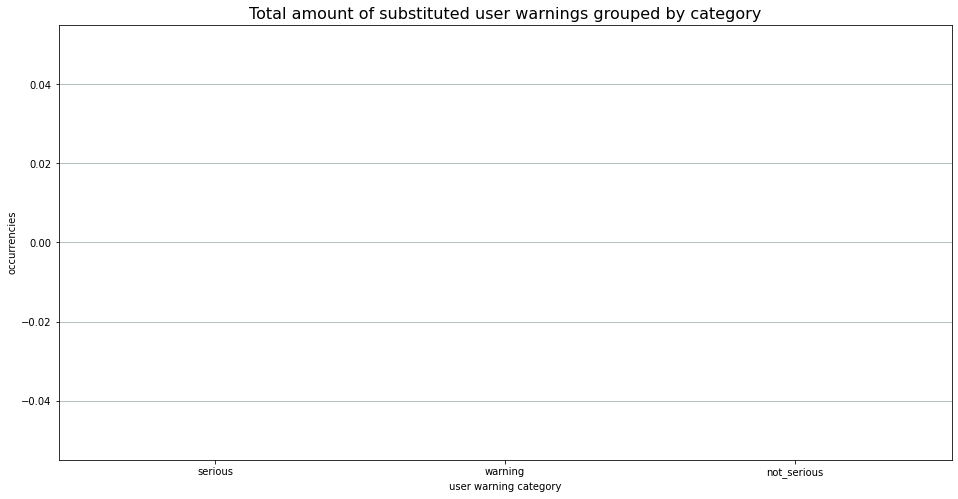

In [177]:
plt.figure(figsize=(16,8))
plt.bar(italian_user_warnings_counter_substituted_registered_df['category'], italian_user_warnings_counter_substituted_registered_df['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='horizontal')
plt.title('Total amount of substituted user warnings grouped by category', fontsize=16)
plt.ylabel('occurrencies')
plt.xlabel('user warning category')
plt.show()

## Explicit user warnings recieved

In [178]:
if not os.path.isfile('italian_precompiled_df/italian_user_warnings_refactored.pkl'):
    italian_user_warnings_refactored_df = list()
    # iterating over the previous dataset
    for i, row in italian_user_warnings_df.iterrows():
        # explicit the user warnings
        for el in row['user_warnings_recieved']:
            new_row = row
            new_row = new_row.drop('user_warnings_recieved')
            new_row = new_row.drop('user_warnings_stats')
            new_row['user_warning_name'] = el['user_warning_name']
            new_row['category'] = el['category']
            new_row['parameters'] = el['parameters']
            new_row['transcluded'] = el['transluded']
            if el['parameters']:
                new_row['date'] = datetime.fromisoformat(el['parameters'][0]['timestamp'].replace('Z', '+00:00'))
            else:
                new_row['date'] = None
            italian_user_warnings_refactored_df.append(new_row)
        if i % 10000 == 0 and i > 0:
            print('I have done {} lines so far'.format(i))
    italian_user_warnings_refactored_df = pd.DataFrame(italian_user_warnings_refactored_df).reset_index(drop=True)
    #italian_user_warnings_refactored_df.head()
    italian_user_warnings_refactored_df.to_pickle('italian_precompiled_df/italian_user_warnings_refactored.pkl')
else:
    italian_user_warnings_refactored_df = pd.read_pickle('italian_precompiled_df/italian_user_warnings_refactored.pkl')

In [179]:
italian_user_warnings_refactored_df.shape

(2081896, 7)

In [180]:
italian_user_warnings_refactored_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081896 entries, 0 to 2081895
Data columns (total 7 columns):
 #   Column             Dtype              
---  ------             -----              
 0   id_talk_page       int64              
 1   name               object             
 2   user_warning_name  object             
 3   category           object             
 4   parameters         object             
 5   transcluded        bool               
 6   date               datetime64[ns, UTC]
dtypes: bool(1), datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 97.3+ MB


In [181]:
italian_user_warnings_refactored_df.describe()

id_talk_page
count  2.081896e+06
mean   5.067907e+06
std    2.272437e+06
min    3.760000e+02
25%    3.247840e+06
50%    5.192107e+06
75%    7.209094e+06
max    8.815998e+06

## Bar chart representing the most used user warnings

In [182]:
italian_user_warnings_refactored_template_occurrencies_with_count_df = italian_user_warnings_refactored_df
italian_user_warnings_refactored_template_occurrencies_with_count_df['count'] = 1

italian_user_warnings_refactored_template_occurrencies_total_df = italian_user_warnings_refactored_template_occurrencies_with_count_df[['user_warning_name', 'count']].groupby('user_warning_name').sum().reset_index().sort_values('count', ascending=False)
italian_user_warnings_refactored_template_occurrencies_transcluded_df = italian_user_warnings_refactored_template_occurrencies_with_count_df.loc[italian_user_warnings_refactored_template_occurrencies_with_count_df['transcluded'] == True, ['user_warning_name', 'count']].groupby('user_warning_name').count().reset_index().sort_values('count', ascending=False)
italian_user_warnings_refactored_template_occurrencies_substituted_df = italian_user_warnings_refactored_template_occurrencies_with_count_df.loc[italian_user_warnings_refactored_template_occurrencies_with_count_df['transcluded'] == False, ['user_warning_name', 'count']].groupby('user_warning_name').count().reset_index().sort_values('count', ascending=False)

## Total amount of user warnings templates grouped by user warnings template

In [183]:
italian_user_warnings_refactored_template_occurrencies_total_df.head()

user_warning_name   count
23       benvenutoip  648958
37       ipcondiviso  408337
53        vandalismo  255273
48              test  163980
46       senza senso  126183

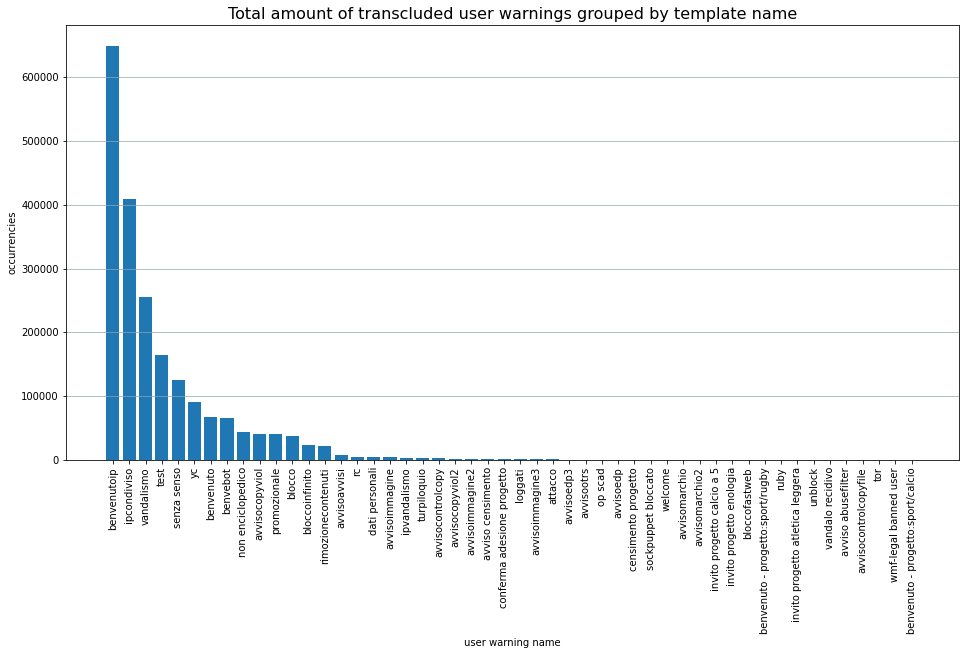

In [184]:
first_fifty = italian_user_warnings_refactored_template_occurrencies_total_df[:50]

plt.figure(figsize=(16,8))
plt.bar(first_fifty['user_warning_name'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Total amount of transcluded user warnings grouped by template name', fontsize=16)
plt.ylabel('occurrencies')
plt.xlabel('user warning name')
plt.show()

## Total amount of transcluded user warnings templates grouped by user warnings template

In [185]:
italian_user_warnings_refactored_template_occurrencies_transcluded_df.head()

user_warning_name   count
23       benvenutoip  648958
37       ipcondiviso  408337
53        vandalismo  255273
48              test  163980
46       senza senso  126183

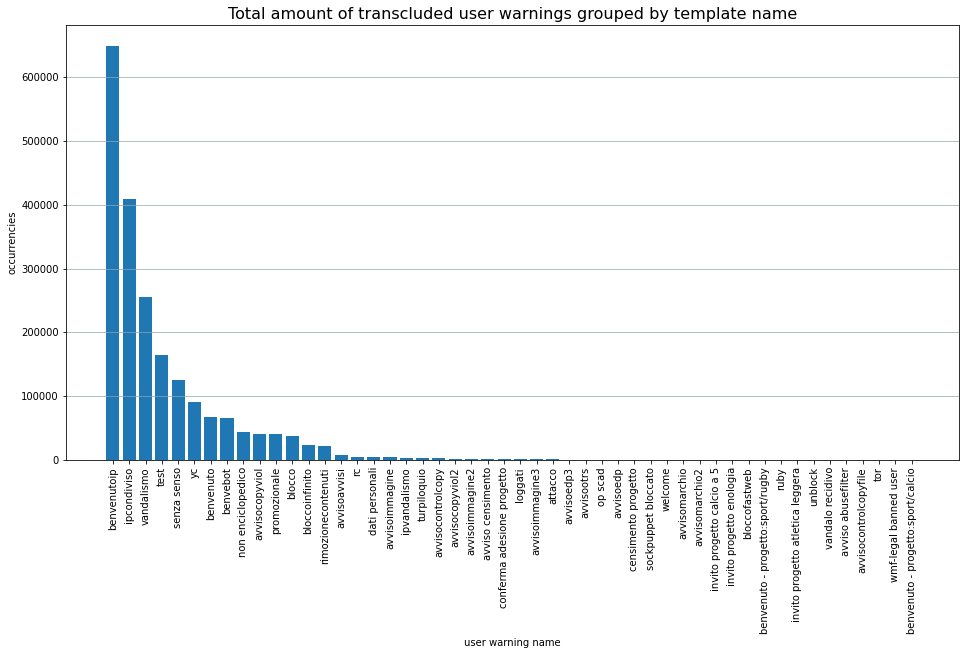

In [186]:
first_fifty = italian_user_warnings_refactored_template_occurrencies_transcluded_df[:50]

plt.figure(figsize=(16,8))
plt.bar(first_fifty['user_warning_name'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Total amount of transcluded user warnings grouped by template name', fontsize=16)
plt.ylabel('occurrencies')
plt.xlabel('user warning name')
plt.show()

## Total amount of substituted user warnings templates grouped by user warnings template

In [187]:
italian_user_warnings_refactored_template_occurrencies_substituted_df.head()

Empty DataFrame
Columns: [user_warning_name, count]
Index: []

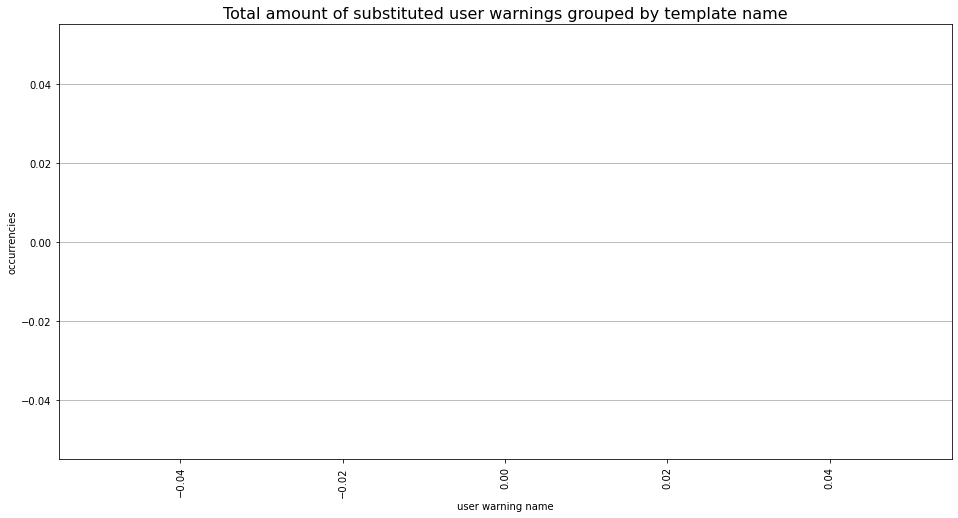

In [188]:
first_fifty = italian_user_warnings_refactored_template_occurrencies_substituted_df[:50]

plt.figure(figsize=(16,8))
plt.bar(first_fifty['user_warning_name'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Total amount of substituted user warnings grouped by template name', fontsize=16)
plt.ylabel('occurrencies')
plt.xlabel('user warning name')
plt.show()

## User warnings name in time

In [189]:
user_warnings_names = italian_user_warnings_refactored_df['user_warning_name'].unique()
user_warnings_names

array(['benvenuto', 'avvisoimmagine', 'avvisocopyviol',
       'conferma adesione progetto', 'test', 'avviso censimento',
       'avvisootrs', 'vandalismo', 'non enciclopedico', 'promozionale',
       'avvisoimmagine2', 'avvisoedp', 'yc', 'avvisoavvisi', 'avvisoedp3',
       'avvisocontrolcopy', 'censimento progetto', 'avvisomarchio',
       'blocco', 'avvisocopyviol2', 'rc', 'benvenutoip', 'senza senso',
       'ipcondiviso', 'turpiloquio', 'loggati', 'ipvandalismo',
       'bloccoinfinito', 'benvebot', 'rimozionecontenuti',
       'invito progetto atletica leggera', 'avvisoimmagine3',
       'dati personali', 'attacco', 'sockpuppet bloccato',
       'avvisomarchio2', 'op scad', 'avvisocontrolcopyfile',
       'invito progetto calcio a 5', 'welcome', 'unblock',
       'invito progetto enologia', 'vandalo recidivo',
       'benvenuto - progetto:sport/rugby', 'tor', 'bloccofastweb', 'ruby',
       'benvenuto - progetto:sport/calcio', 'invito progetto giappone',
       'wmf-legal banned 

In [190]:
user_warnings_by_name_df = italian_user_warnings_refactored_template_occurrencies_with_count_df
user_warnings_by_name_df['date'] = pd.to_datetime(italian_user_warnings_refactored_template_occurrencies_with_count_df['date']).dt.date
user_warnings_by_name_df['date'] = user_warnings_by_name_df['date'].apply(lambda dt: dt.replace(day=1))

user_warnings_by_name_transcluded = user_warnings_by_name_df.loc[user_warnings_by_name_df['transcluded'] == True]
user_warnings_by_name_substituted = user_warnings_by_name_df.loc[user_warnings_by_name_df['transcluded'] == False]

## User warnings over time considering only transcluded templates occurrencies

In [191]:
# user_warnings_by_name_transcluded.head()

In [192]:
user_warnings_by_name_transcluded = user_warnings_by_name_transcluded[['user_warning_name', 'date', 'count']].groupby(['user_warning_name', 'date']).sum().reset_index()
user_warnings_by_name_transcluded.head()

user_warning_name        date  count
0           attacco  2011-06-01      6
1           attacco  2011-07-01      3
2           attacco  2011-08-01      8
3           attacco  2011-09-01      9
4           attacco  2011-10-01      1

In [193]:
user_warnings_by_name_transcluded.shape

(4320, 3)

In [194]:
user_warnings_by_name_transcluded.describe()

count
count    4320.000000
mean      481.920370
std      6155.161627
min         1.000000
25%         7.000000
50%        41.000000
75%       255.000000
max    395268.000000

#### Clean data

In [195]:
user_warnings_by_name_transcluded_cleaned_df = list()
dates_to_consider = [ d for d in italian_user_warnings_counter_total_df['date'].unique() if d <= date(2021, 1, 1)]
for d in dates_to_consider:
    for u_w in user_warnings_names:
        elem = user_warnings_by_name_transcluded.loc[(user_warnings_by_name_transcluded['date'] == d) & (user_warnings_by_name_transcluded['user_warning_name'] == u_w)]
        if elem.empty:
            user_warnings_by_name_transcluded_cleaned_df.append([u_w, d, 0])
        else:
            user_warnings_by_name_transcluded_cleaned_df.append(np.array(elem)[0])
user_warnings_by_name_transcluded_cleaned_df = pd.DataFrame(user_warnings_by_name_transcluded_cleaned_df).reset_index(drop=True).set_axis(['user_warning_name', 'date', 'count'], axis=1)
user_warnings_by_name_transcluded_cleaned_df.head()

user_warning_name        date  count
0                   benvenuto  2002-01-01      0
1              avvisoimmagine  2002-01-01      0
2              avvisocopyviol  2002-01-01      0
3  conferma adesione progetto  2002-01-01      0
4                        test  2002-01-01      0

In [196]:
user_warnings_by_name_transcluded_cleaned_df.tail()

user_warning_name        date  count
13277                    desbloquear  2021-01-01      0
13278  benvenuto - progetto:medicina  2021-01-01      0
13279                   unblock-auto  2021-01-01      0
13280           invito progetto punk  2021-01-01      0
13281      benvenuto - progetto:punk  2021-01-01      0

In [197]:
user_warnings_by_name_transcluded_cleaned_df.describe()

count
count   13282.000000
mean      156.740325
std      3517.322956
min         0.000000
25%         0.000000
50%         0.000000
75%         6.000000
max    395268.000000

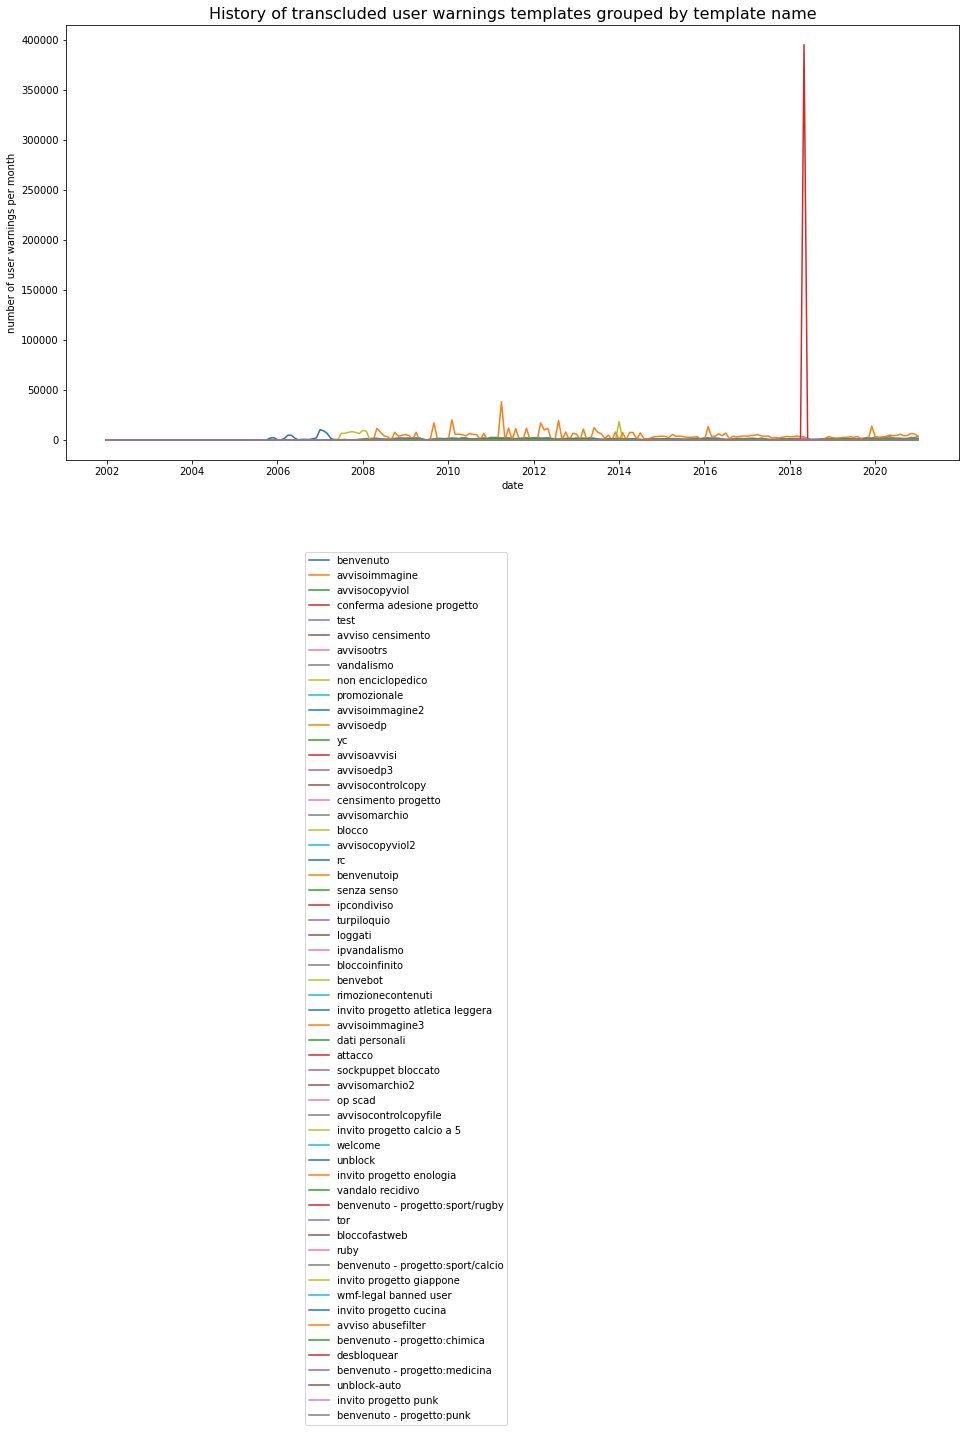

In [198]:
plt.figure(figsize=(16,8))
for u_w in user_warnings_by_name_transcluded_cleaned_df['user_warning_name'].unique():
    template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == u_w]
    template_name = template_name.loc[template_name['date'] <= date(2021, 2, 1)]
    plt.plot(template_name['date'], template_name['count'], label = u_w)
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded user warnings templates grouped by template name', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [199]:
user_warnings_by_name_transcluded_cleaned_df.loc[user_warnings_by_name_transcluded_cleaned_df['count'] == user_warnings_by_name_transcluded_cleaned_df['count'].max()]

user_warning_name        date   count
11391       ipcondiviso  2018-05-01  395268

In [200]:
fig = px.line(user_warnings_by_name_transcluded_cleaned_df, x='date', y='count', color='user_warning_name', title='History of transcluded user warnings templates grouped by template name')
fig.show()

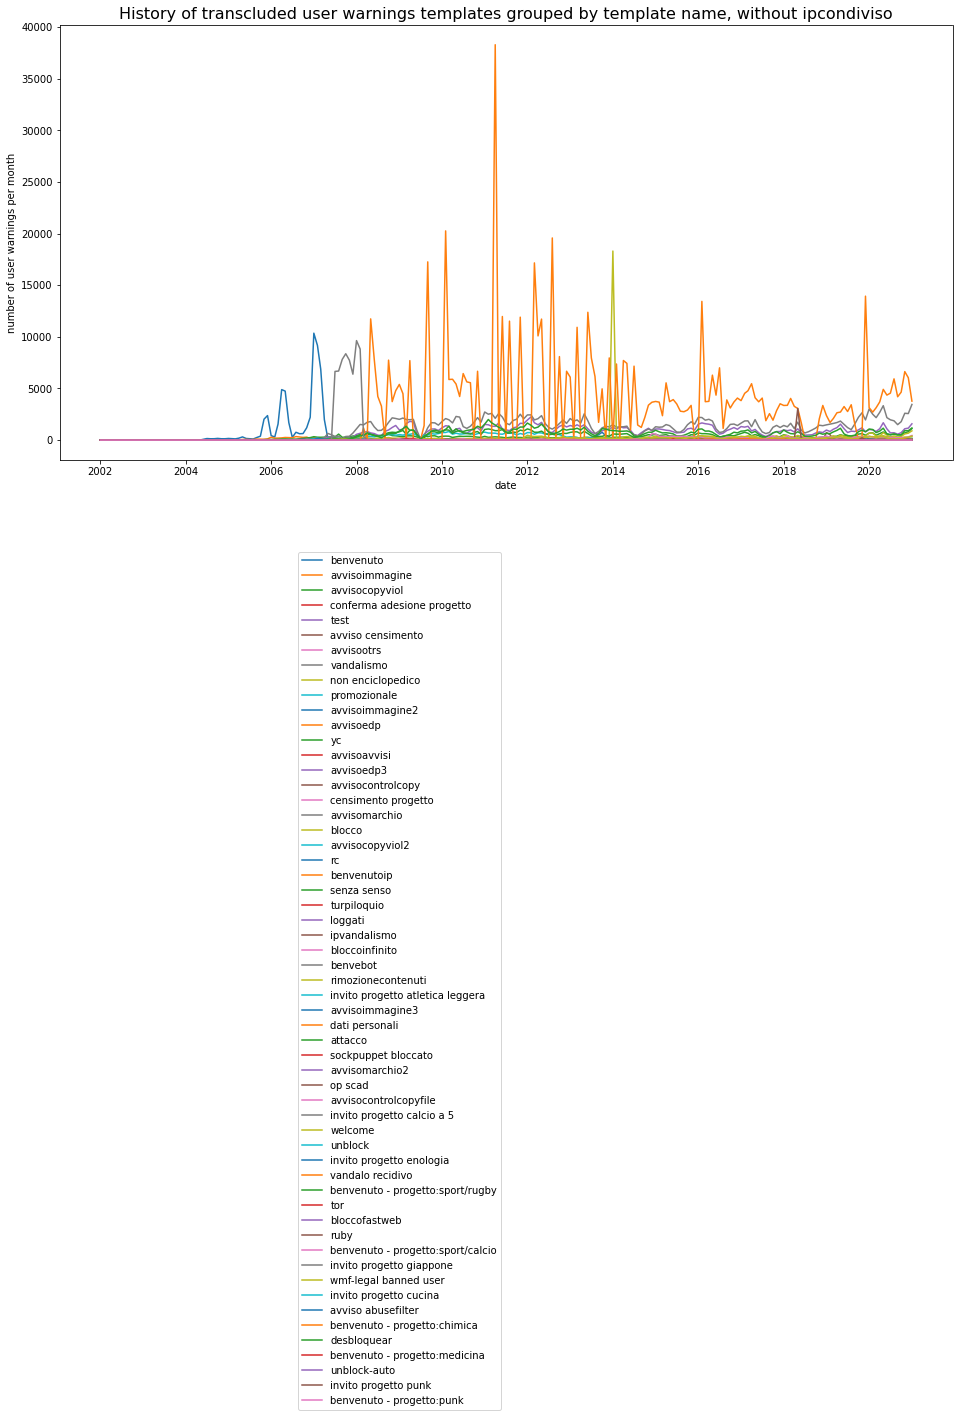

In [201]:
plt.figure(figsize=(16,8))
for u_w in user_warnings_by_name_transcluded_cleaned_df['user_warning_name'].unique():
    if not u_w == 'ipcondiviso':
        template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == u_w]
        template_name = template_name.loc[template_name['date'] <= date(2021, 2, 1)]
        plt.plot(template_name['date'], template_name['count'], label = u_w)
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded user warnings templates grouped by template name, without ipcondiviso', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [202]:
user_warnings_by_name_transcluded_cleaned_df = user_warnings_by_name_transcluded_cleaned_df.loc[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] != 'ipcondiviso']
fig = px.line(user_warnings_by_name_transcluded_cleaned_df, x='date', y='count', color='user_warning_name', title='History of transcluded user warnings templates grouped by template name')
fig.show()

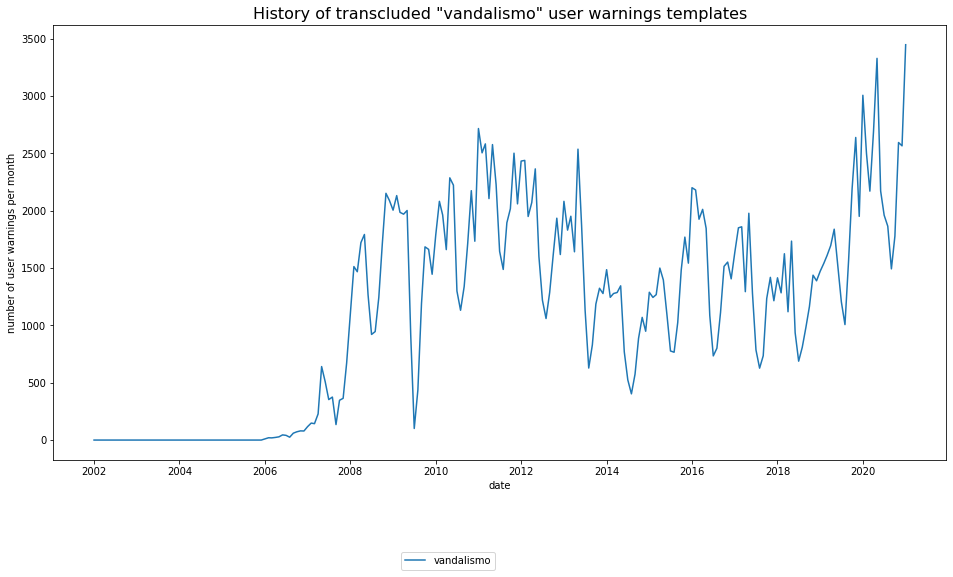

In [203]:
# Vandalismo
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'vandalismo']
plt.plot(template_name['date'], template_name['count'], label = 'vandalismo')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "vandalismo" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [204]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
13231        vandalismo  2021-01-01   3448

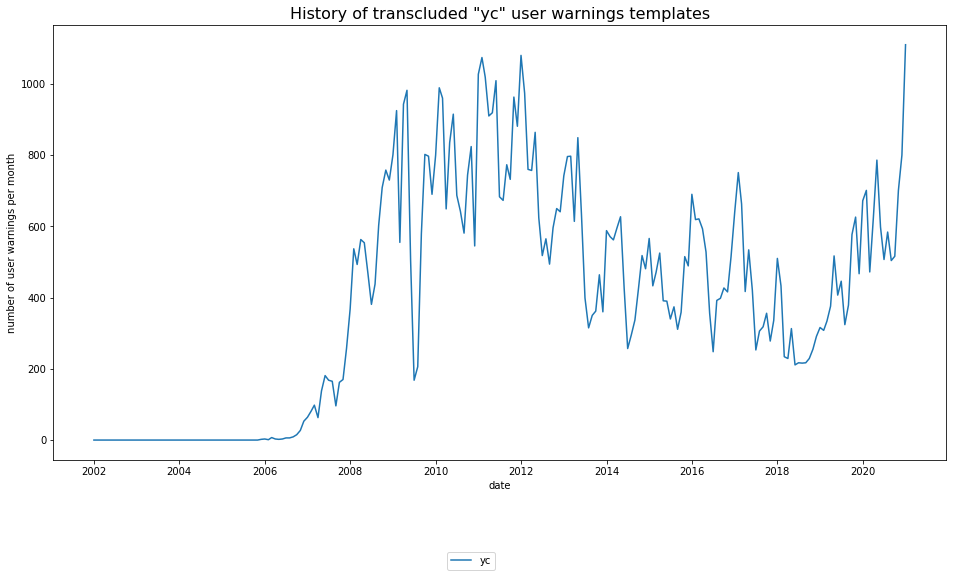

In [205]:
# yc
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'yc']
plt.plot(template_name['date'], template_name['count'], label = 'yc')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "yc" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [206]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
13236                yc  2021-01-01   1110

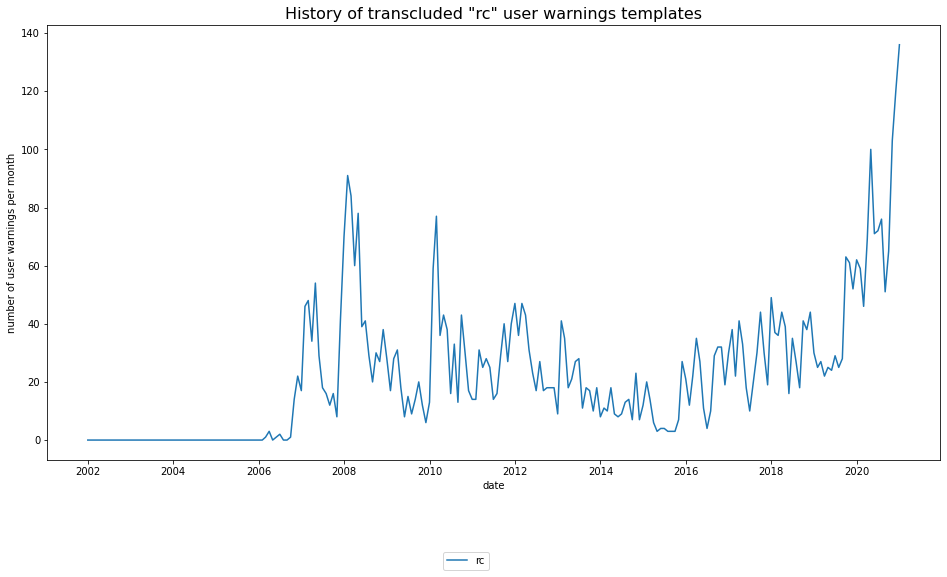

In [207]:
# rc
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'rc']
plt.plot(template_name['date'], template_name['count'], label = 'rc')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "rc" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [208]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
13244                rc  2021-01-01    136

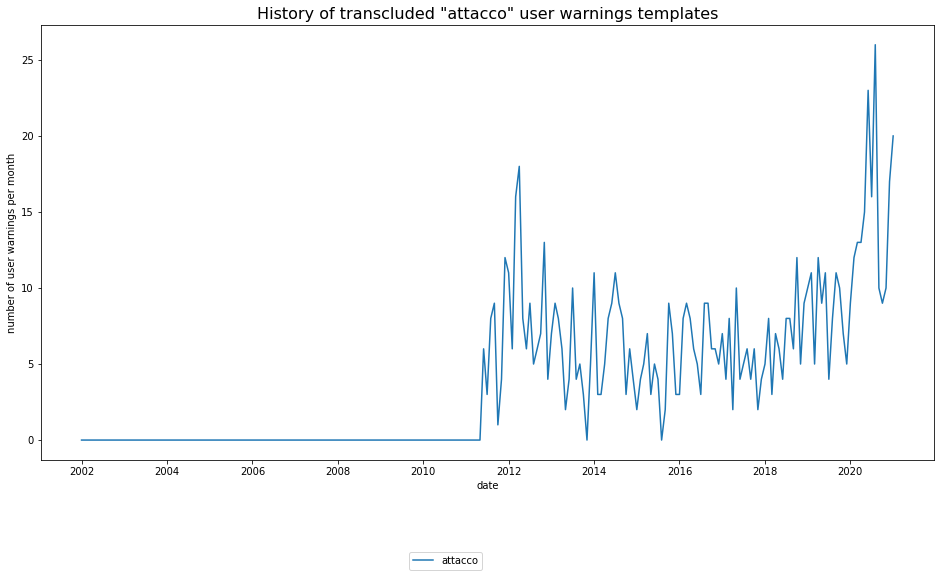

In [209]:
# attacco
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'attacco']
plt.plot(template_name['date'], template_name['count'], label = 'attacco')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "attacco" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [210]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
12967           attacco  2020-08-01     26

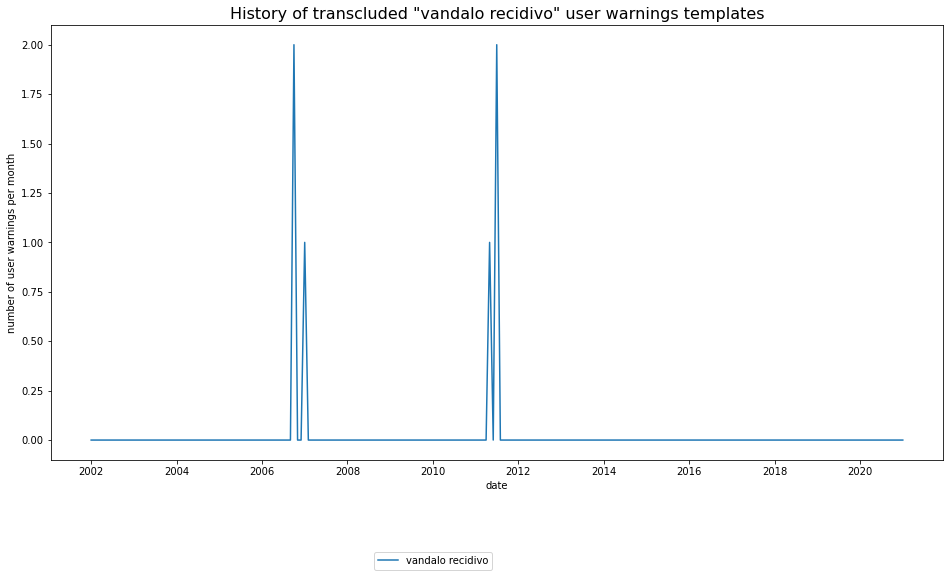

In [211]:
# vandalo recidivo
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'vandalo recidivo']
plt.plot(template_name['date'], template_name['count'], label = 'vandalo recidivo')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "vandalo recidivo" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [212]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
3348  vandalo recidivo  2006-10-01      2
6654  vandalo recidivo  2011-07-01      2

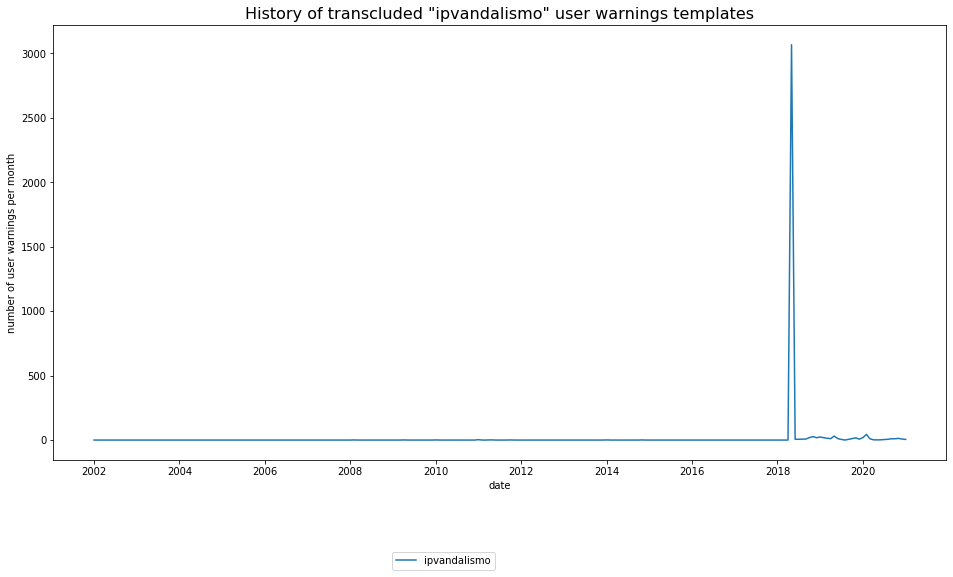

In [213]:
# ipvandalismo
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'ipvandalismo']
plt.plot(template_name['date'], template_name['count'], label = 'ipvandalismo')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "ipvandalismo" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [214]:
template_name.describe()

count
count   229.000000
mean     15.104803
std     202.631974
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max    3067.000000

In [215]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
11394      ipvandalismo  2018-05-01   3067

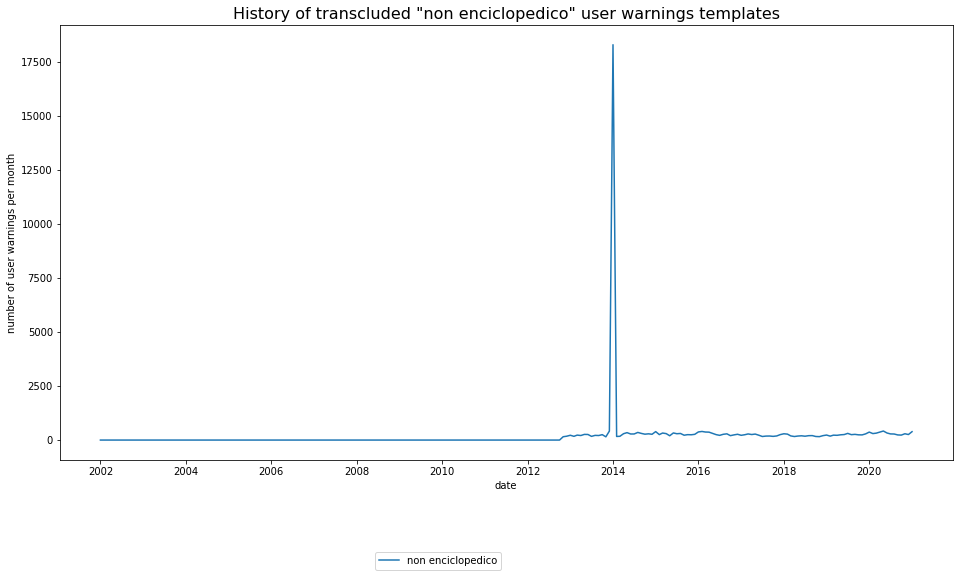

In [216]:
# non enciclopedico
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'non enciclopedico']
plt.plot(template_name['date'], template_name['count'], label = 'non enciclopedico')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "non enciclopedico" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [217]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
8360  non enciclopedico  2014-01-01  18308

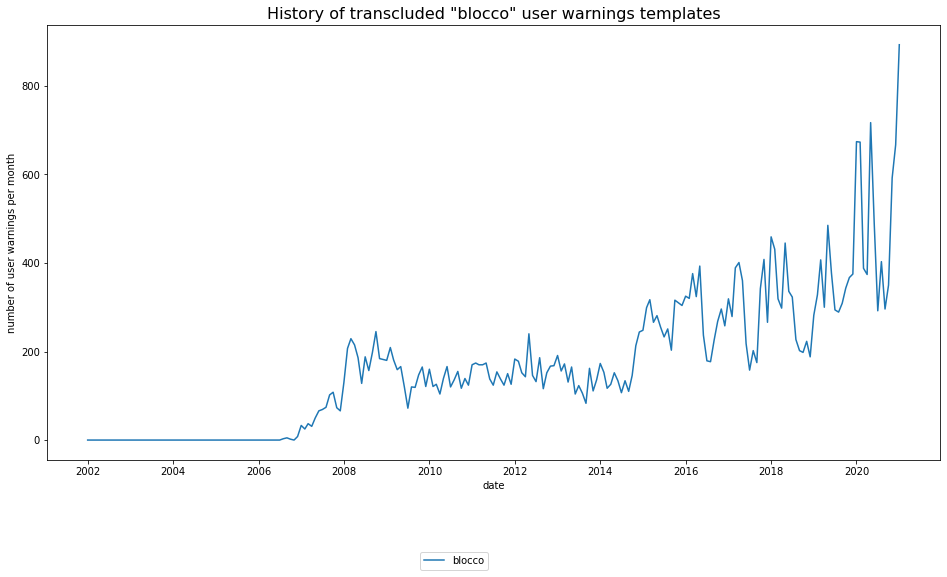

In [218]:
# blocco
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'blocco']
plt.plot(template_name['date'], template_name['count'], label = 'blocco')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "blocco" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [219]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
13242            blocco  2021-01-01    893

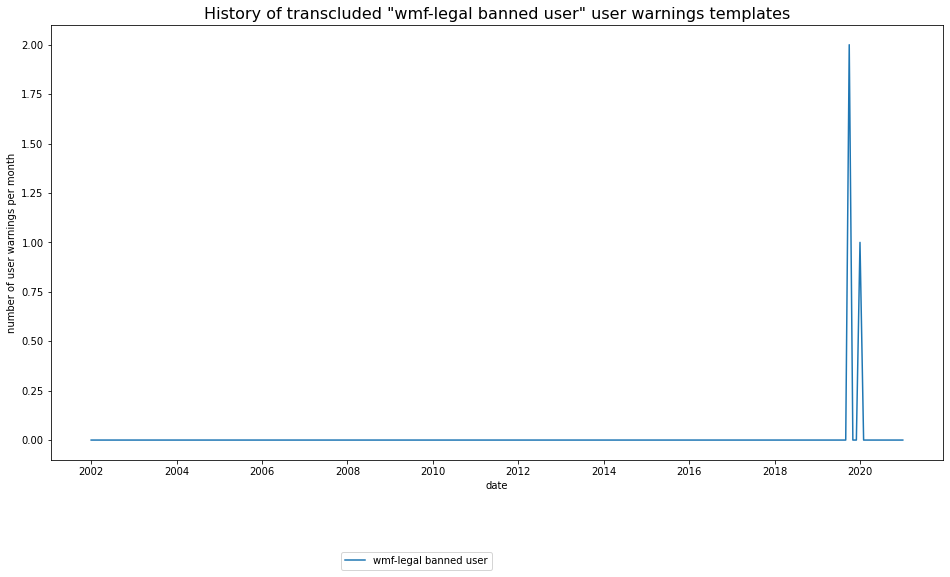

In [220]:
# wmf-legal banned user
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'wmf-legal banned user']
plt.plot(template_name['date'], template_name['count'], label = 'wmf-legal banned user')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "wmf-legal banned user" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [221]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
12403  wmf-legal banned user  2019-10-01      2

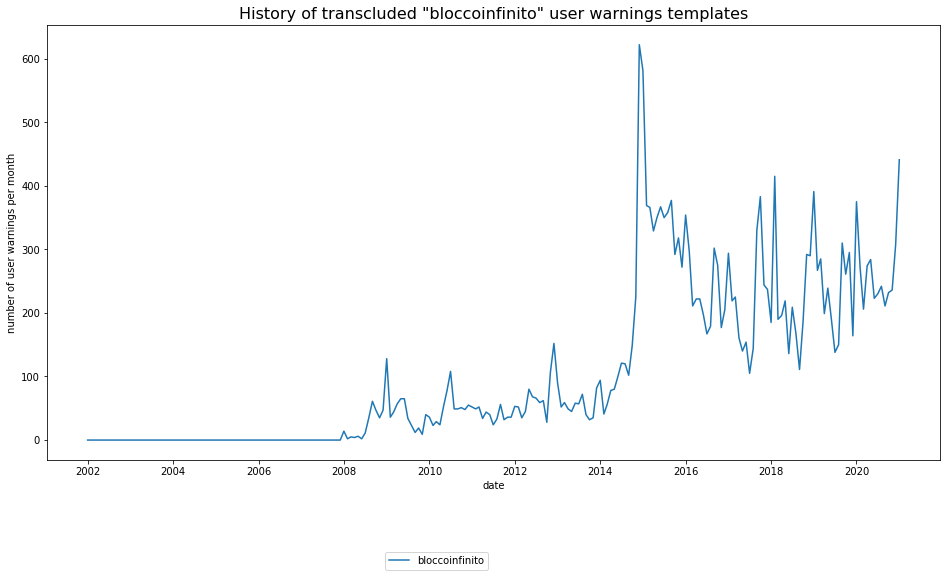

In [222]:
# bloccoinfinito
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'bloccoinfinito']
plt.plot(template_name['date'], template_name['count'], label = 'bloccoinfinito')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "bloccoinfinito" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [223]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
9017    bloccoinfinito  2014-12-01    622

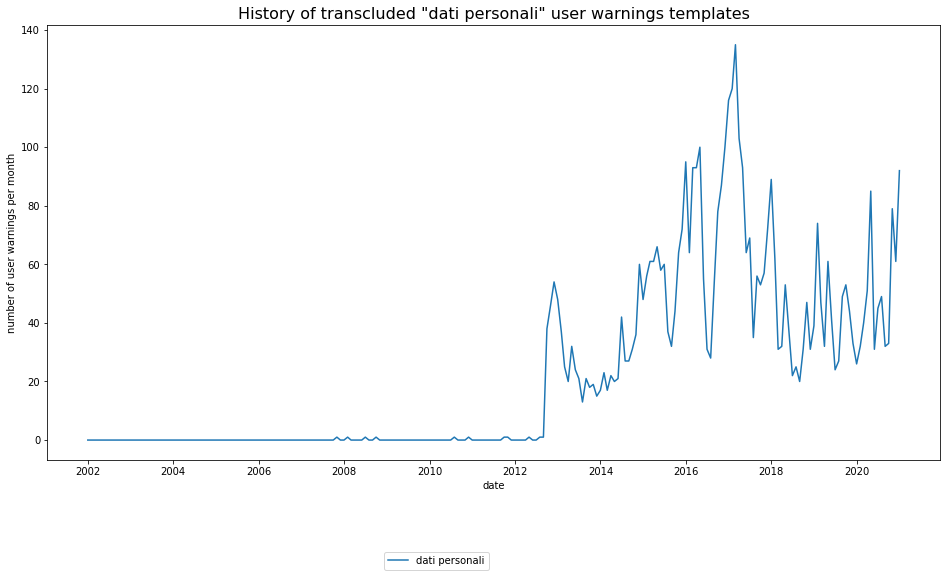

In [224]:
# dati personali
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'dati personali']
plt.plot(template_name['date'], template_name['count'], label = 'dati personali')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "dati personali" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [225]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
10588    dati personali  2017-03-01    135

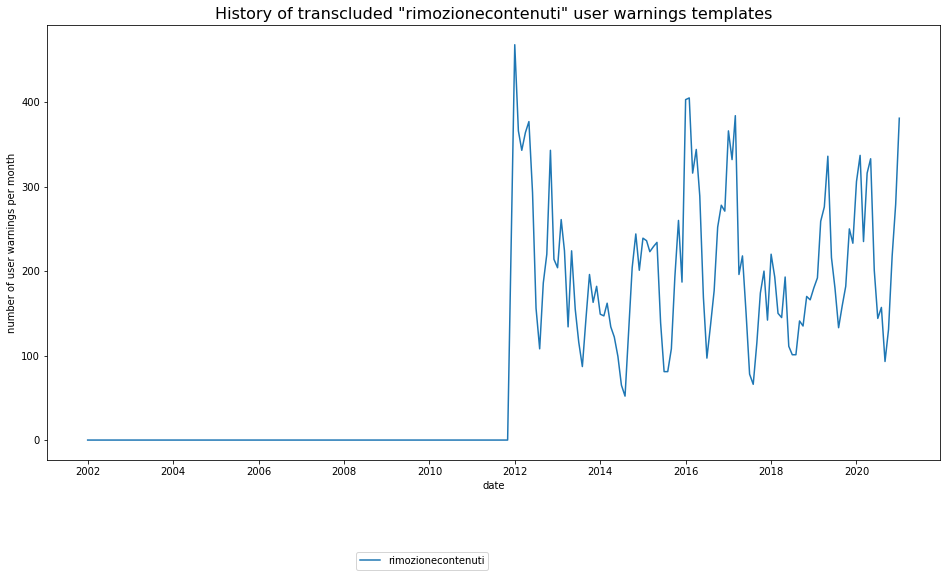

In [226]:
# rimozionecontenuti
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'rimozionecontenuti']
plt.plot(template_name['date'], template_name['count'], label = 'rimozionecontenuti')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "rimozionecontenuti" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [227]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
6989  rimozionecontenuti  2012-01-01    468

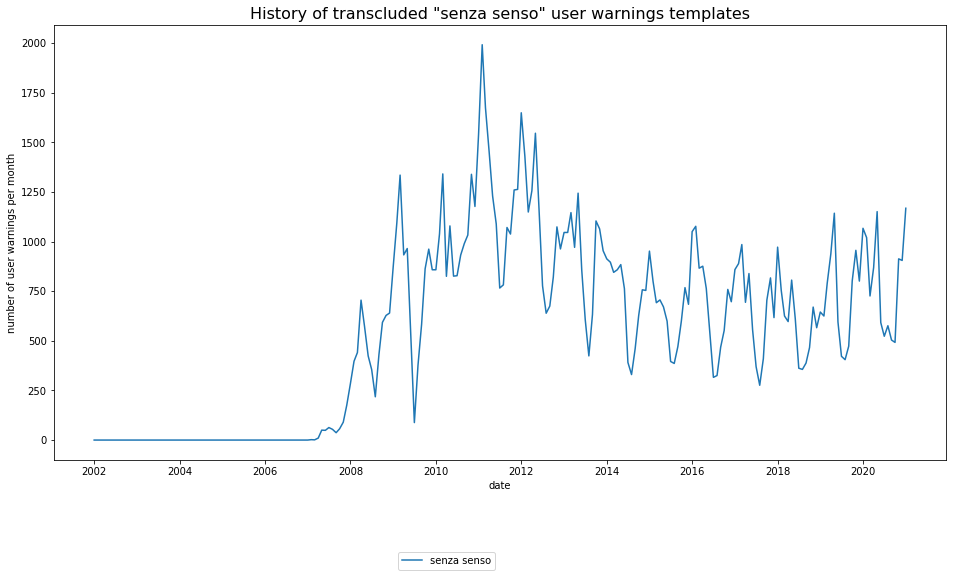

In [228]:
# senza senso
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'senza senso']
plt.plot(template_name['date'], template_name['count'], label = 'senza senso')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "senza senso" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [229]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
6344       senza senso  2011-02-01   1992

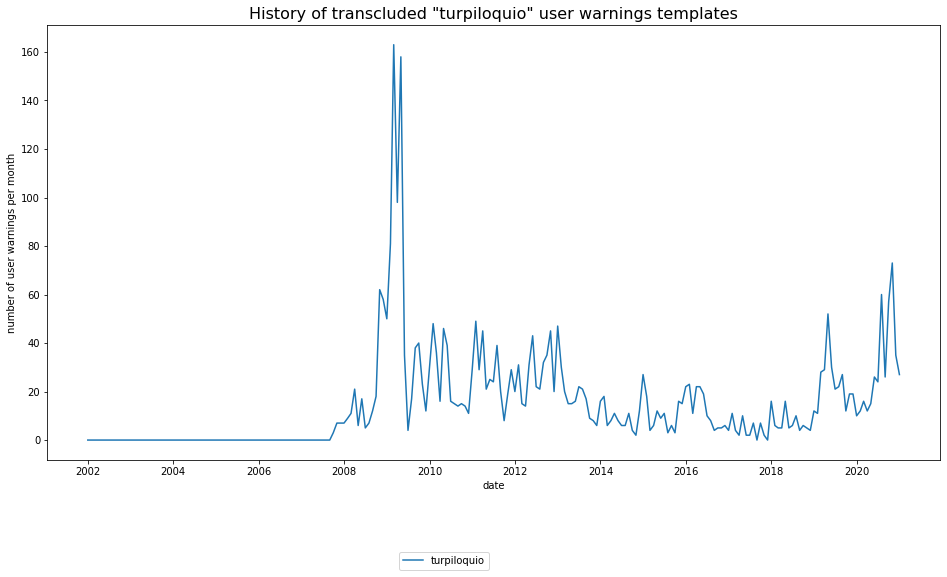

In [230]:
# turpiloquio
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'turpiloquio']
plt.plot(template_name['date'], template_name['count'], label = 'turpiloquio')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "turpiloquio" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [231]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
5012       turpiloquio  2009-03-01    163

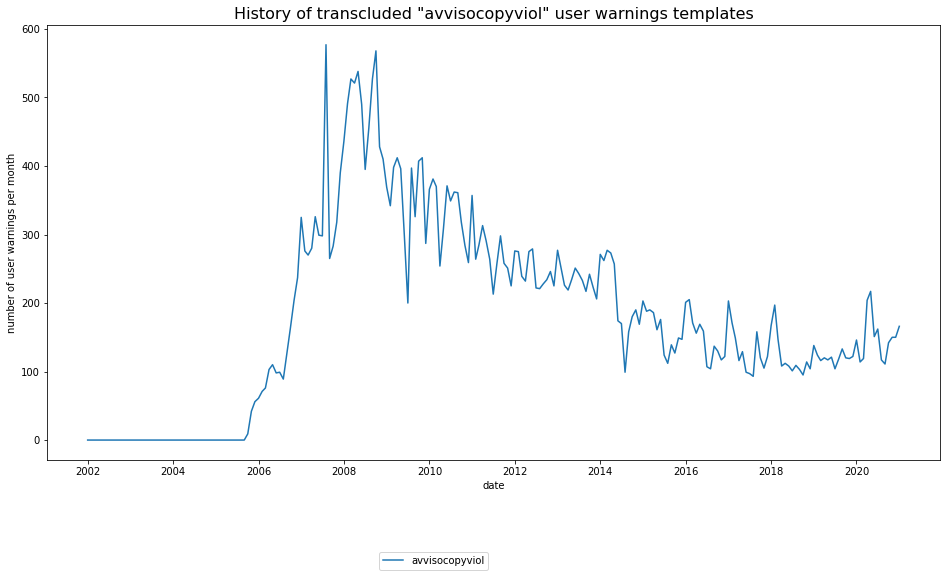

In [232]:
# avvisocopyviol
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'avvisocopyviol']
plt.plot(template_name['date'], template_name['count'], label = 'avvisocopyviol')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "avvisocopyviol" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [233]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
3888    avvisocopyviol  2007-08-01    577

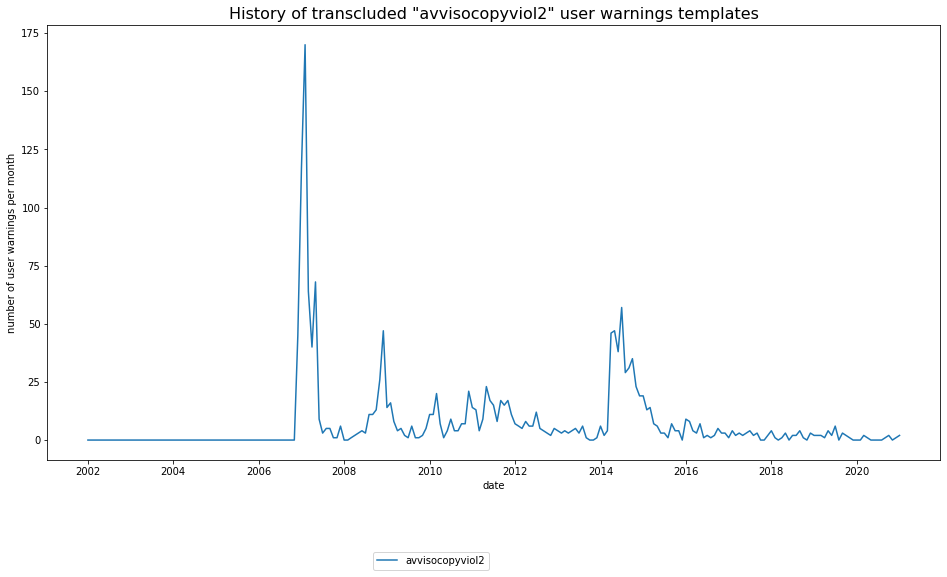

In [234]:
# avvisocopyviol2
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'avvisocopyviol2']
plt.plot(template_name['date'], template_name['count'], label = 'avvisocopyviol2')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "avvisocopyviol2" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [235]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
3557   avvisocopyviol2  2007-02-01    170

### On some interesting warnings

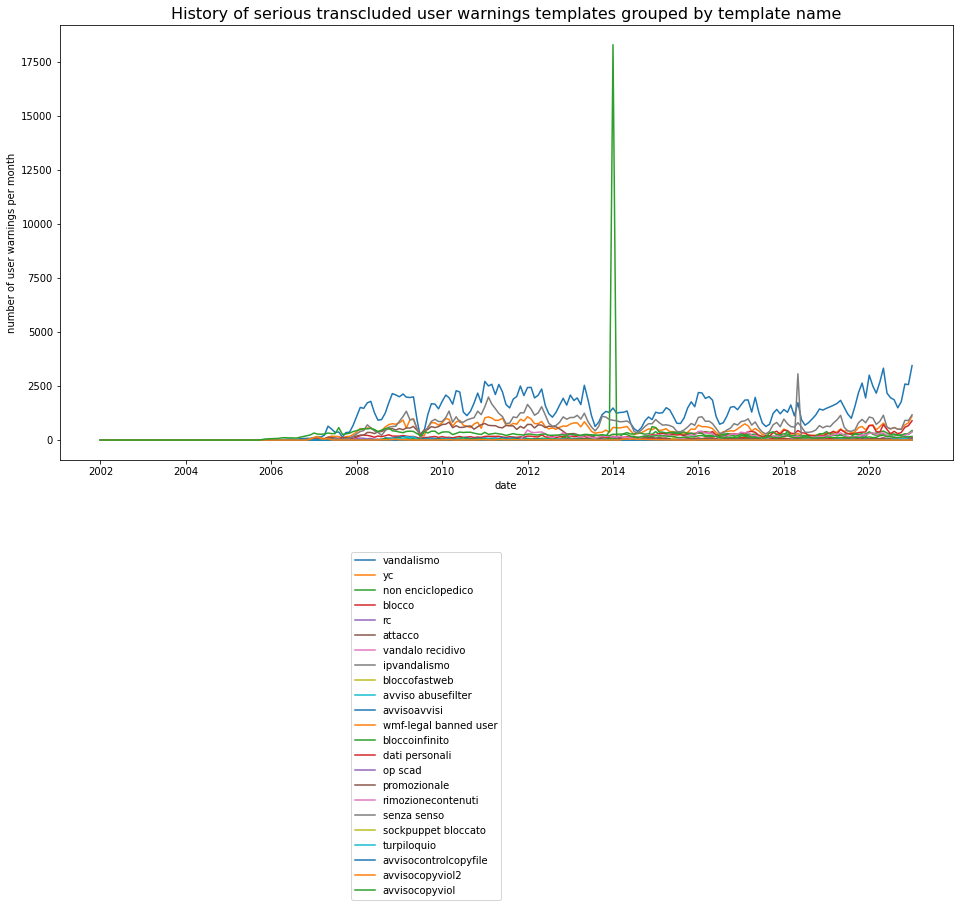

In [236]:
interesting_user_warnings = [
    'vandalismo', 
    'yc', 
    'non enciclopedico', 
    'blocco', 
    'rc', 
    'attacco', 
    'vandalo recidivo', 
    'ipvandalismo',
    'bloccofastweb',
    'avviso abusefilter',
    'avvisoavvisi',
    'wmf-legal banned user',
    'bloccoinfinito',
    'dati personali',
    'op scad',
    'promozionale',
    'rimozionecontenuti',
    'senza senso',
    'sockpuppet bloccato',
    'turpiloquio',
    'avvisocontrolcopyfile',
    'avvisocopyviol2',
    'avvisocopyviol'
]
plt.figure(figsize=(16,8))
for u_w in interesting_user_warnings:
    template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == u_w]
    plt.plot(template_name['date'], template_name['count'], label = u_w)
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of serious transcluded user warnings templates grouped by template name', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

## Parameter analisys

In [237]:
# user_warnings_by_name_df.head()

## Extract parameters for the most important user warnings

In [238]:
interesting_user_warnings_df_list = [list() for _ in interesting_user_warnings]
for i, user_warning in enumerate(interesting_user_warnings):
    if not os.path.isfile('italian_precompiled_df/interesting_user_warnings_{}.pkl'.format(user_warning)):
        extracted = user_warnings_by_name_df.loc[user_warnings_by_name_df['user_warning_name'] == user_warning]
        for j, row in extracted.iterrows():
            for el in row['parameters']:
                new_row = row
                new_row = new_row.drop('parameters')
                new_row['parameters'] = el['options']
                interesting_user_warnings_df_list[i].append(new_row)
        interesting_user_warnings_df_list[i] = pd.DataFrame(interesting_user_warnings_df_list[i]).reset_index(drop=True)
        interesting_user_warnings_df_list[i].to_pickle('italian_precompiled_df/interesting_user_warnings_{}.pkl'.format(user_warning))
    else:
        interesting_user_warnings_df_list[i] = pd.read_pickle('italian_precompiled_df/interesting_user_warnings_{}.pkl'.format(user_warning))

In [239]:
# interesting_user_warnings_df_list[0].head()

## Most used parameters per template

In [240]:
# dataframes for wikibreaks with param name and value
last_axes = None
most_used_parameters_per_template_df_list = list()

for i, user_warning in enumerate(interesting_user_warnings_df_list):
    # grouping
    if not os.path.isfile('italian_precompiled_df/most_used_parameters_per_template_{}.pkl'.format(interesting_user_warnings[i])):
        print('italian_precompiled_df/most_used_parameters_per_template_{}.pkl'.format(interesting_user_warnings[i]))
        extracted = interesting_user_warnings_df_list[i]
        grouped = extracted.loc[extracted['parameters'] != {}, ['user_warning_name', 'parameters', 'count']]
        most_used_parameters_per_template_list = list()
        for j, row in extracted.iterrows():
            for key, value in row['parameters'].items():
                new_row = row
                new_row = new_row.drop('parameters')
                new_row['param_name'] = key
                new_row['param_value'] = value
                most_used_parameters_per_template_list.append(new_row)
        most_used_parameters_per_template_df_list.append(pd.DataFrame(most_used_parameters_per_template_list).reset_index(drop=True))
        most_used_parameters_per_template_df_list[-1].to_pickle('italian_precompiled_df/most_used_parameters_per_template_{}.pkl'.format(interesting_user_warnings[i]))
    else:
        most_used_parameters_per_template_df_list.append(pd.read_pickle('italian_precompiled_df/most_used_parameters_per_template_{}.pkl'.format(interesting_user_warnings[i])))

# most_used_parameters_per_template_df_list[0].head()

In [241]:
most_used_parameters_per_template_grouped_df_list = list()
for i, user_warning in enumerate(interesting_user_warnings_df_list):
    # grouping
    extracted = most_used_parameters_per_template_df_list[i]
    if not extracted.empty:
        extracted['param_name'] = extracted['param_name'].str.strip()
        extracted = extracted[['count', 'user_warning_name', 'param_name']].groupby(['param_name', 'user_warning_name']).count().reset_index(drop=False)
    most_used_parameters_per_template_grouped_df_list.append(extracted)
most_used_parameters_per_template_grouped_df_list[0].head()

param_name user_warning_name   count
0                   vandalismo       3
1          1        vandalismo  306441
2         10        vandalismo       2
3         11        vandalismo       2
4          2        vandalismo    1207

## Most used parameters per user warnings

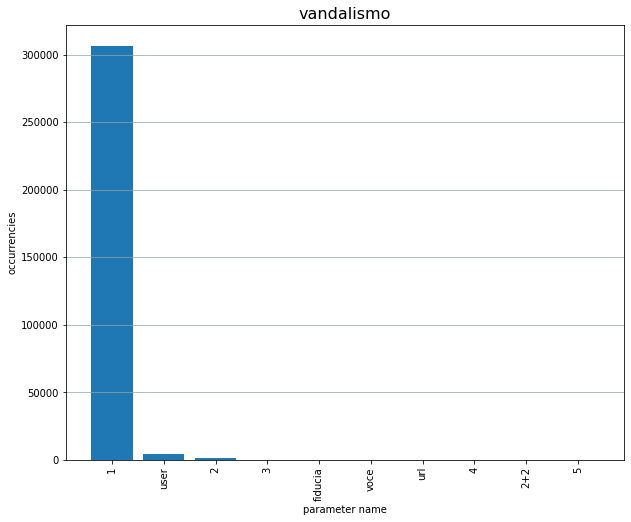

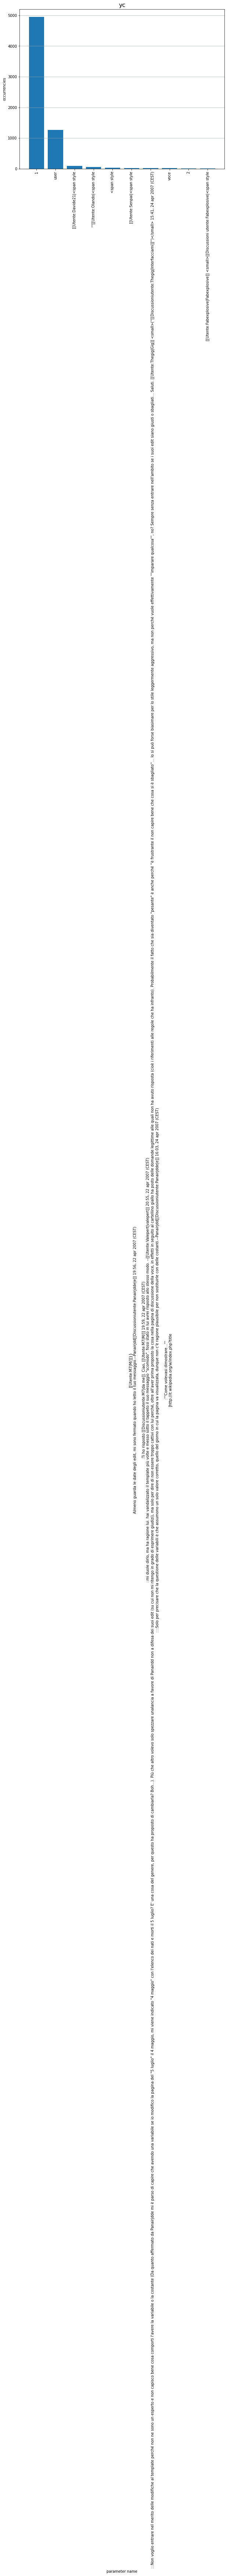

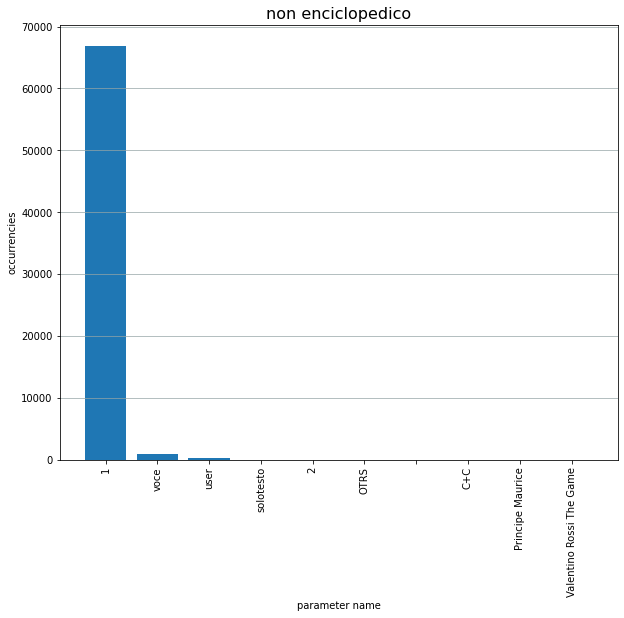

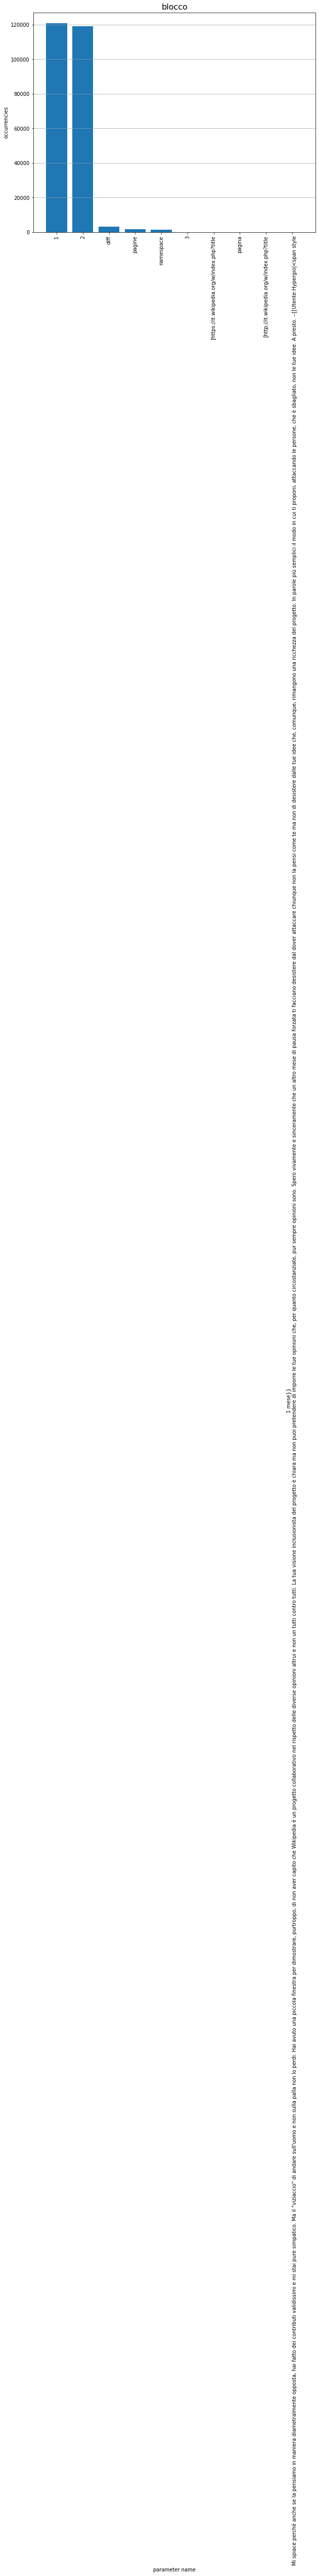

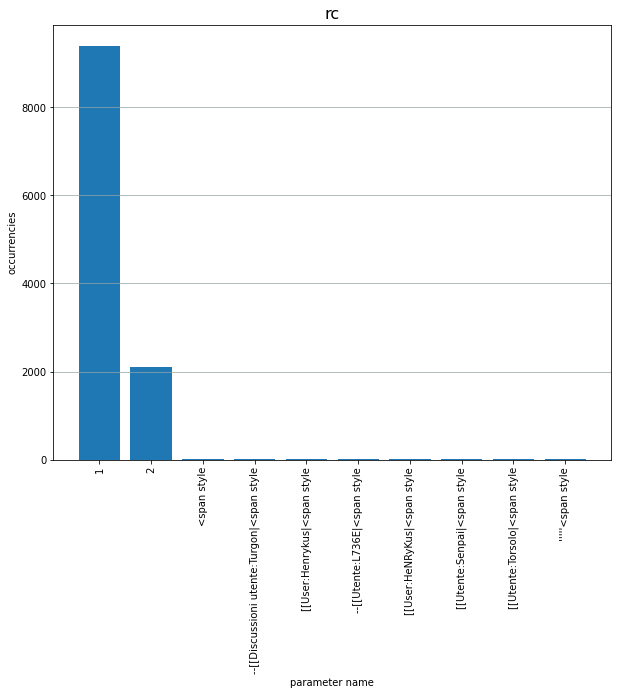

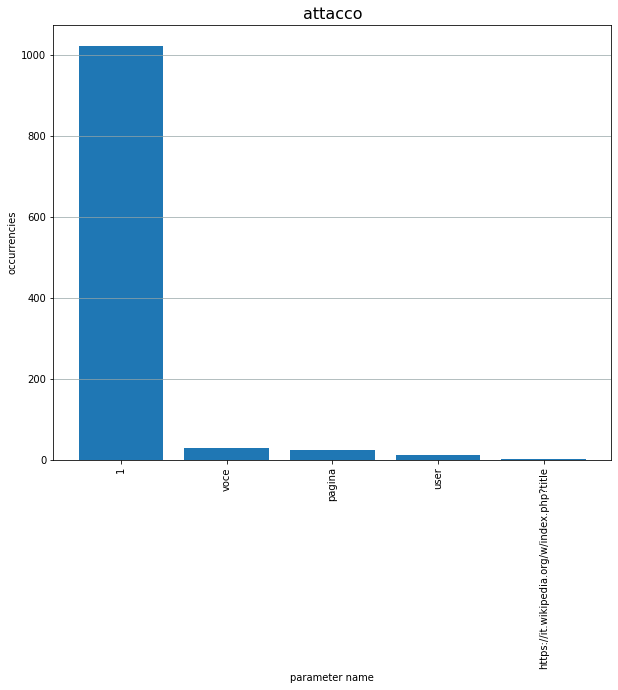

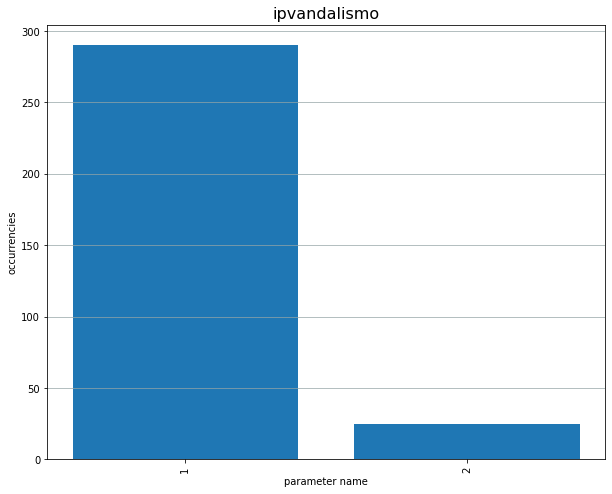

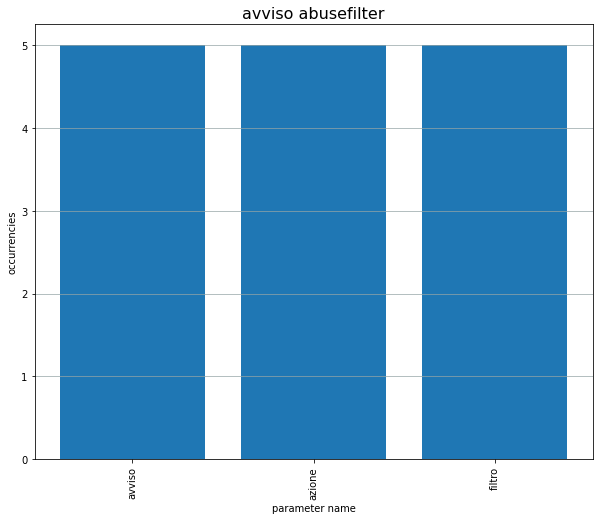

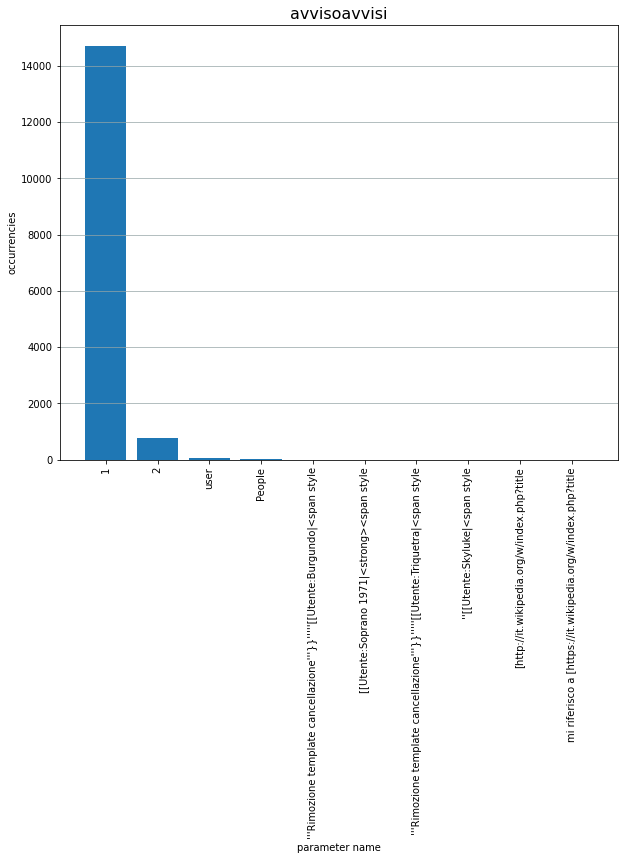

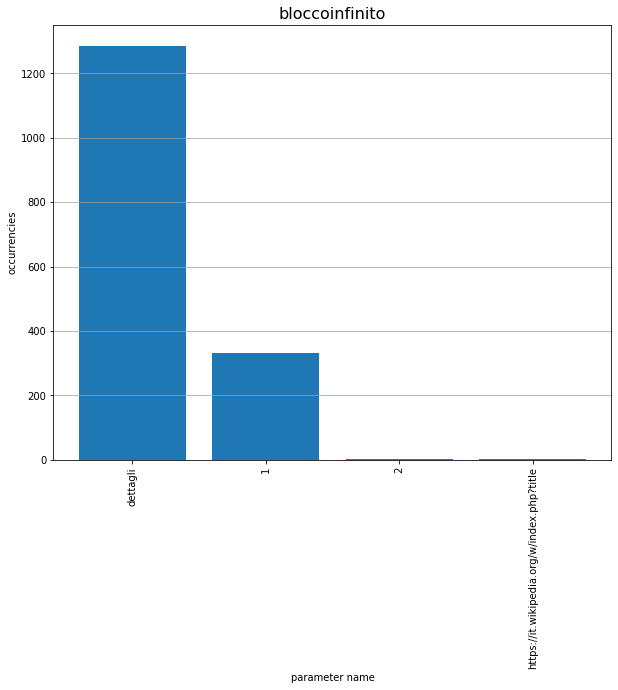

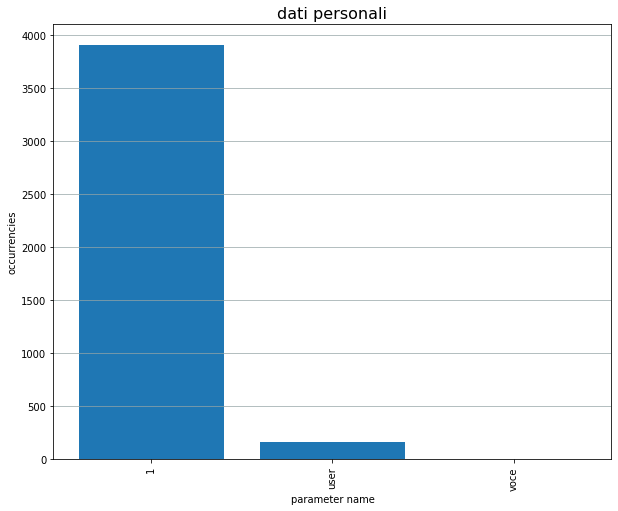

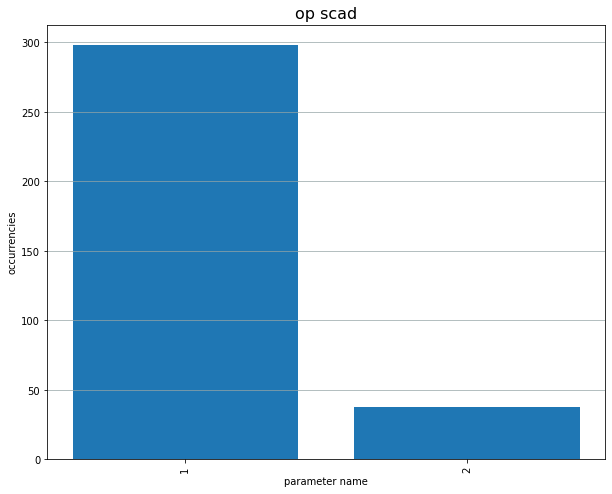

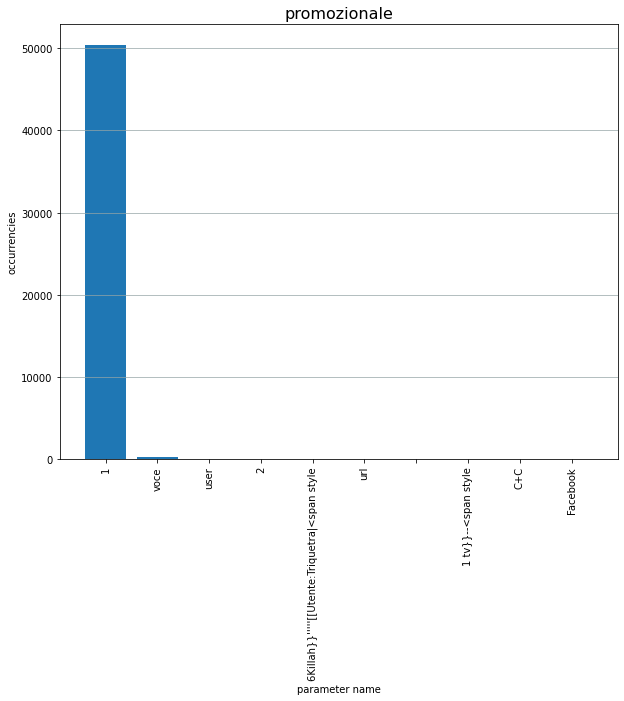

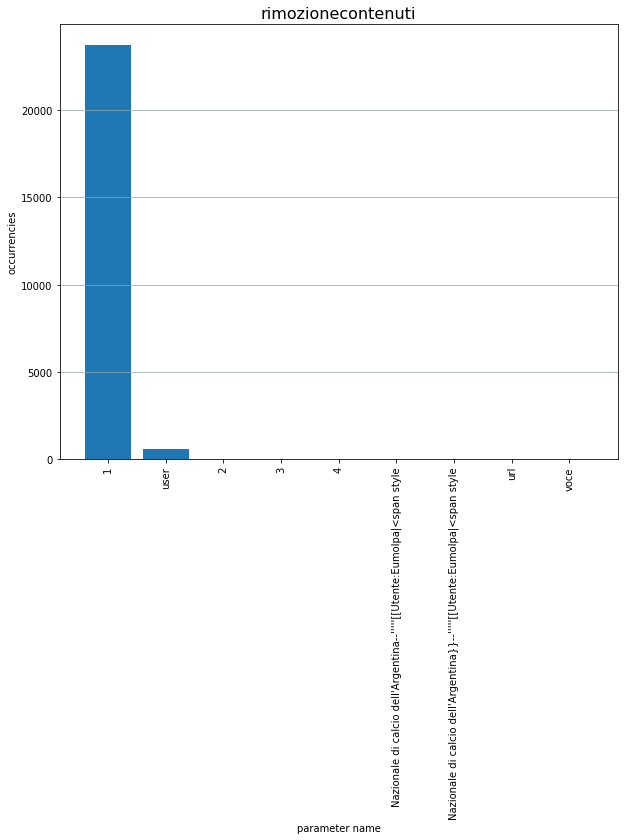

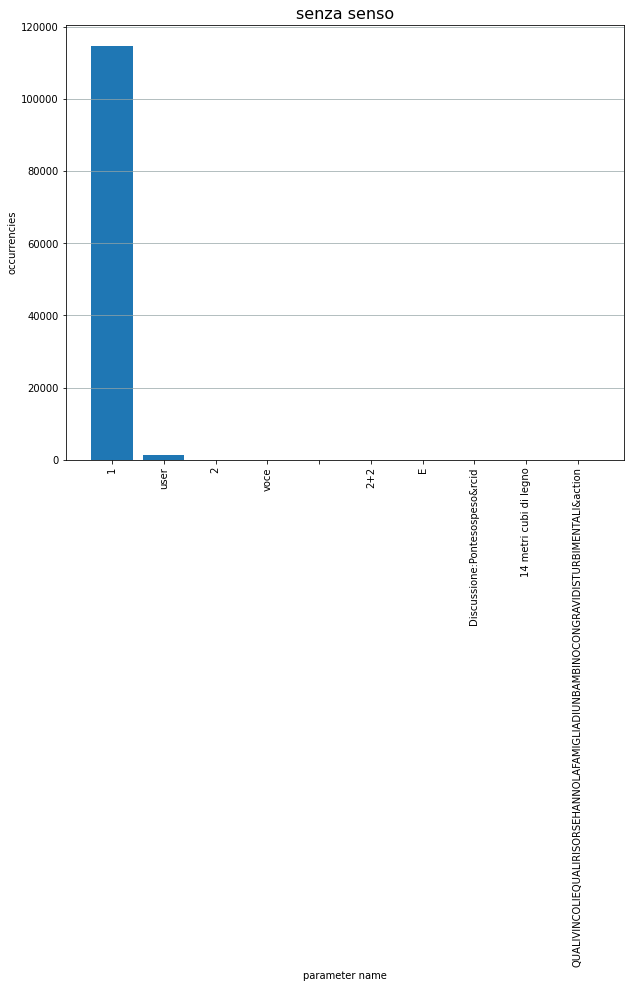

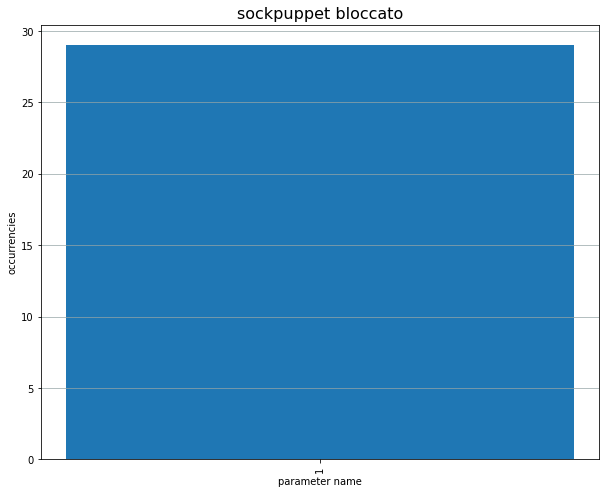

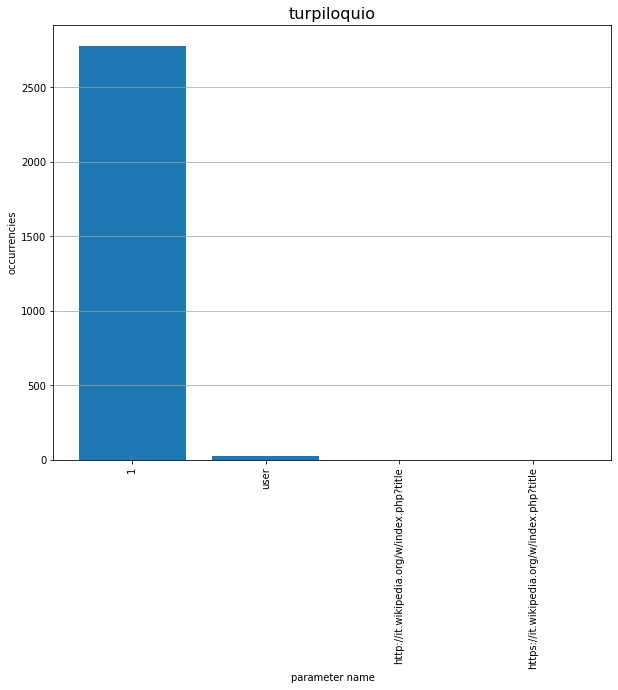

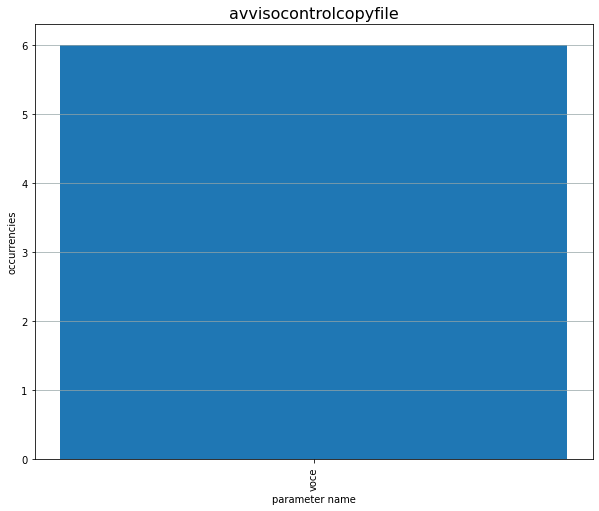

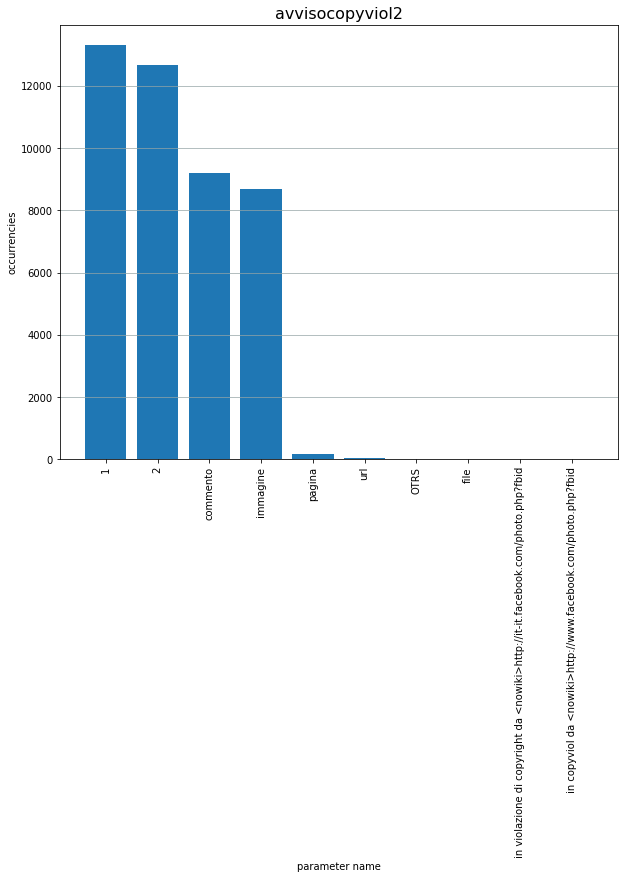

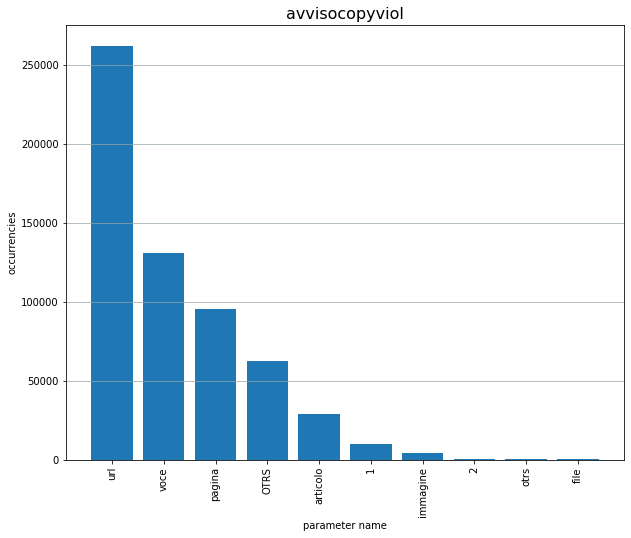

In [242]:
for i, user_warning in enumerate(interesting_user_warnings):
    # grouping
    extracted = most_used_parameters_per_template_grouped_df_list[i].drop_duplicates()
    
    if not extracted.empty:
        extracted = extracted.sort_values(by=['count'], ascending = False)
        first_five = extracted[:10]
        plt.figure(figsize=(10,8))
        plt.bar(first_five['param_name'], first_five['count'])
        plt.title(user_warning, fontsize=16)
        plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
        plt.xticks(rotation='vertical')
        plt.ylabel('occurrencies')
        plt.xlabel('parameter name')
        plt.show()

## Some paramers in textual form

In [243]:
for i, user_warning in enumerate(interesting_user_warnings):
    # grouping
    extracted = most_used_parameters_per_template_grouped_df_list[i]
    
    if not extracted.empty:
        print('User warning {}:'.format(user_warning))
        print('------------------------------------------------------------------')
        parameters_list = extracted.sort_values(by=['count'], ascending = False)
        parameters_list = parameters_list['param_name']
        parameters_list = parameters_list[:5]
        original_values = most_used_parameters_per_template_df_list[i].drop_duplicates()
        for param in parameters_list:
            print('param named: {}'.format(param))
            values = original_values.loc[original_values['param_name'] == param, ['count', 'param_name', 'param_value', 'user_warning_name']].groupby(['param_name', 'param_value', 'user_warning_name']).count().reset_index(drop=False)
            values = values.sort_values(by=['count'], ascending = False)
            values = values[:5]
            for index, row in values.iterrows():
                val = row['param_value']
                counter = row['count']
                print('\tParam value {} counter {}'.format(val, counter))
        print('------------------------------------------------------------------')

User warning vandalismo:
------------------------------------------------------------------
param named: 1
	Param value Roma counter 227
	Param value Stati Uniti d'America counter 223
	Param value Francia counter 222
	Param value Canis lupus familiaris counter 196
	Param value Napoleone Bonaparte counter 193
param named: user
	Param value Dimitrij Kasev counter 3657
	Param value PupyFaki counter 96
	Param value Allions counter 1
param named: 2
	Param value Milano counter 4
	Param value Salmo (rapper) counter 4
	Param value Gianluigi Donnarumma counter 3
	Param value Dear Jack counter 3
	Param value India counter 3
param named: 3
	Param value Dries Mertens counter 2
	Param value Spagna counter 2
	Param value Virgil van Dijk counter 2
	Param value PewDiePie vs T-Series counter 1
	Param value Selena Gomez counter 1
param named: fiducia
	Param value si counter 15
	Param value sì counter 2
------------------------------------------------------------------
User warning yc:
------------------

	Param value Claudio Baglioni counter 15
	Param value Anastacia counter 12
	Param value Jennifer Lopez counter 10
	Param value Marina Rocco counter 8
	Param value Céline Dion counter 8
param named: 2
	Param value Rimozione template di servizio counter 13
	Param value commento counter 10
	Param value commento di esempio counter 6
	Param value '''Rimozione template di servizio''' counter 3
	Param value '''Rimozione di template di servizio''' counter 3
param named: user
	Param value Dimitrij Kasev counter 42
	Param value PupyFaki counter 23
param named: People
	Param value  Shit counter 1
param named: '''Rimozione template cancellazione'''}}'''''[[Utente:Burgundo|<span style
	Param value "color:#0000CC;">Burgundo</span>]]'''''<sup>([[Discussioniutente:Burgundo|posta]])</sup> 17:24, 8 mar 2011 (CET) counter 1
	Param value "color:#0000CC;">Burgundo</span>]]'''''<sup>([[Discussioniutente:Burgundo|posta]])</sup> 17:24, 8 mar 2011 (CET)
''' counter 1
-------------------------------------------

param named: url
	Param value  counter 1718
	Param value indicato nell'articolo counter 93
	Param value link alla fonte copiata counter 52
	Param value indicato nella voce stessa counter 34
	Param value testo canzone counter 31
param named: voce
	Param value  counter 875
	Param value Wikipedia:Pagina delle prove counter 92
	Param value nome della voce counter 66
	Param value  titolo voce  counter 25
	Param value Template:ViolazioneCopyright counter 11
param named: pagina
	Param value  counter 542
	Param value Wikipedia:Pagina delle prove counter 113
	Param value titolodellavoce counter 93
	Param value nome della voce counter 22
	Param value   counter 8
param named: OTRS
	Param value no counter 9000
	Param value  counter 4864
	Param value NO counter 182
	Param value n counter 86
	Param value x counter 25
param named: articolo
	Param value Nome dell'articolo counter 21
	Param value  counter 15
	Param value Nome della voce counter 13
	Param value xxx counter 5
	Param value </nowiki>''Nome